In [74]:
import matplotlib.pyplot as plt
plt.style.use(['classic'])
import astropy.coordinates as coord
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from astropy.io import fits
from scipy import stats
from scipy.stats import binned_statistic
from scipy.linalg import block_diag,eigh
plt.rcParams['font.family']='stixgeneral'
plt.rcParams.update({'font.size':5})
from astropy.io import fits
import ebf
import pdb
from mpl_toolkits.mplot3d import Axes3D
from astropy.coordinates import (CartesianRepresentation,CartesianDifferential)
from astropy.coordinates import Galactic
from astropy import units as u1
from astropy.coordinates import SkyCoord
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.stats import chisquare
from itertools import groupby
import scipy.integrate as integrate
import scipy.special as special
from scipy.stats import poisson
from scipy.optimize import minimize
from random import choices
import scipy.stats as st
from astropy.stats import jackknife_resampling
from astropy.stats import jackknife_stats
from scipy.integrate import simps
import scipy
scipy.__version__
from autograd import grad,hessian,jacobian
import numpy.linalg as lin
import autograd.numpy as np
plt.style.use(['classic'])

from sklearn import linear_model



Running a galaxia simulation for halo17 with mag ranging from 14-20 mag, r < 1000 kpc, fsample 0.1, popID10.

# Width distribution of the narrow peak

In [75]:
width02 =  [37.28,37.56,42.29,36.38,46.7,37.34]
width05 = [44.11,37.4,29.8,23.78,19.38,18.86]
width07 = [0.43,33.16,13.81,29.58,30.45]
width08 = [46.29,28.86,45.22,23.59,24.29,21.11]
width09 = [21.27,4.23,7.55,80.0,21.28]
width10 = [56.13,38.72,36.88,34.06,33.43,34.58,40.12]
width12 = [90.22,47.61,17.64,27.5,26.801,60.82]
width14 = [277.42,39.74,63.89,12.15,28.11]
width15 = [306.06,35.3,48.29,40.74,44.93,80]
width17 = [44.89,34.78,39.27,34.66,37.63,32.44,25.18]
width20 = [293.89,44.41,23.24,204.74,30.52,33.91,21.45]

amp02 =  [609.9,653.45,342.6,208.16,91.97,26.17]
amp05 = [31.78,53.98,168.96,199.47,130.16,28.23]
amp07 = [1744.85,80.89,68.32,62.45,134.37]
amp08 = [145.43,126.07,66.56,64.98,121.6,78.01]
amp09 = [23.13,41.36,117.64,23.01]
amp10 = [132.72,62.49,97.35,205.84,290.84,166.29,88.08]
amp12 = [228.05,86.1,399.77,907.11,322.48,820.7]
amp14 = [1030.07,51.76,32.51,70.76,147.49]
amp15 = [1561.94,85.27,212.46,207.47,207.47,570.54,375.27]
amp17 = [611.26,1254.02,536.7,931.24,2020.65,917.36,618.32]
amp20 = [2037.404,88.88,51.97,304.003,47.32,52.21,50.87]
#halo15 shell0 has problem 
#halo20 shell2,5

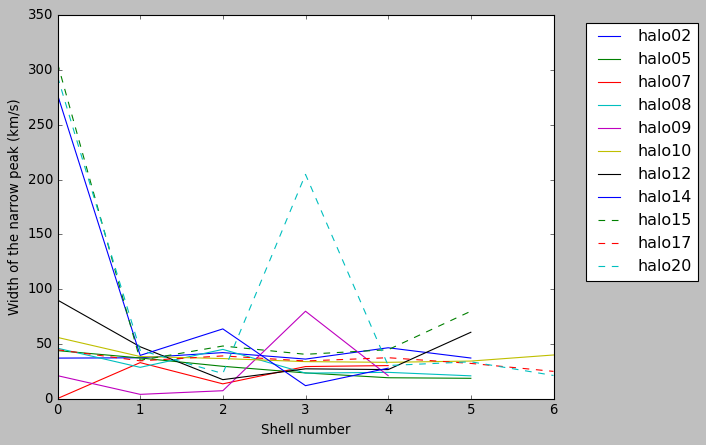

In [76]:
plt.plot(range(0,len(width02)),width02,label='halo02')
plt.plot(range(0,len(width05)),width05,label='halo05')
plt.plot(range(0,len(width07)),width07,label='halo07')
plt.plot(range(0,len(width08)),width08,label='halo08')
plt.plot(range(0,len(width09)),width09,label='halo09')
plt.plot(range(0,len(width10)),width10,label='halo10')
plt.plot(range(0,len(width12)),width12,label='halo12')
plt.plot(range(0,len(width14)),width14,label='halo14')
plt.plot(range(0,len(width15)),width15,label='halo15',linestyle='--')
plt.plot(range(0,len(width17)),width17,label='halo17',linestyle='--')
plt.plot(range(0,len(width20)),width20,label='halo20',linestyle='--')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Shell number')
plt.ylabel('Width of the narrow peak (km/s)')
plt.show()

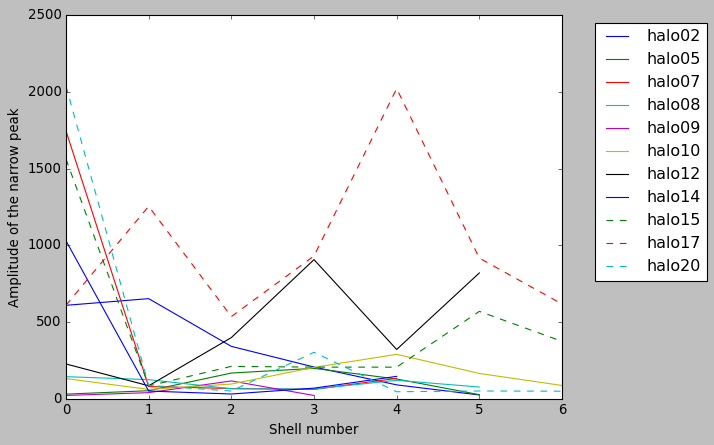

In [77]:
plt.plot(range(0,len(amp02)),amp02,label='halo02')
plt.plot(range(0,len(amp05)),amp05,label='halo05')
plt.plot(range(0,len(amp07)),amp07,label='halo07')
plt.plot(range(0,len(amp08)),amp08,label='halo08')
plt.plot(range(0,len(amp09)),amp09,label='halo09')
plt.plot(range(0,len(amp10)),amp10,label='halo10')
plt.plot(range(0,len(amp12)),amp12,label='halo12')
plt.plot(range(0,len(amp14)),amp14,label='halo14')
plt.plot(range(0,len(amp15)),amp15,label='halo15',linestyle='--')
plt.plot(range(0,len(amp17)),amp17,label='halo17',linestyle='--')
plt.plot(range(0,len(amp20)),amp20,label='halo20',linestyle='--')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Shell number')
plt.ylabel('Amplitude of the narrow peak')
plt.show()

In [78]:
ratio02 =  [0.25,0.29,0.34,0.36,0.38,0.39]
ratio05 = [0.18,0.19,0.2,0.21,0.17,0.17]
ratio07 = [0,0.22,0.1,0.22,0.34]
ratio08 = [0.17,0.13,0.21,0.13,0.18,0.23]
ratio09 = [0.13,0.03,0.08,0.62,0.69]
ratio10 = [0.25,0.21,0.23,0.32,0.37,0.58,0.88]
ratio12 = [0,0.51,0.29,0.22,0.35,0.83,0.91]
ratio14 = [0,0.19,0.33,0.1,0.29]
ratio15 = [0,0.16,0.29,0.31,0.48,0.82]
ratio17 = [0.43,0.46,0.58,0.66,1.0,0.99,0.93]
ratio20 = [0,0.2,0.12,0,0.21,0.31,0.4]
bhb= [0,0,0.41,0.41,0.48]

In [79]:
finalmass =  [8.4,8.6,9.0, 8.3 ,7.0, 8.6, 7.2, 8.8, 4.7, 6.7, 9.1]
accutime = [5.3 ,7.0 ,7.4 ,6.3 ,2.1, 6.2 ,4.4, 7.1 ,1.5, 2.9 ,7.2]
phss= [0.96 ,0.03, 0.12, 0.40, 0.25, 0.01 ,8.42, 2.55, 0.01, 0.04, 0.02]
lm = [8.3 ,9.2, 8.9, 8.3,10.8 ,10.5, 7.4, 9.3,10.0, 9.7, 9.0]

In [80]:
ratio12 = [0, 0.52,  0.32, 0.5, 0.99, 1.0]
##plt.scatter(finalmass,accutime)
#plt.show()
halotime= [10191874000.0,
 11270949000.0,
 10933142000.0,
 11600903000.0,
 6761849000.0,
 6603140000.0,
 7542809000.0,
 4648271000.0,
 6793471000.0,
 6670758400.0,
 7241796000.0]

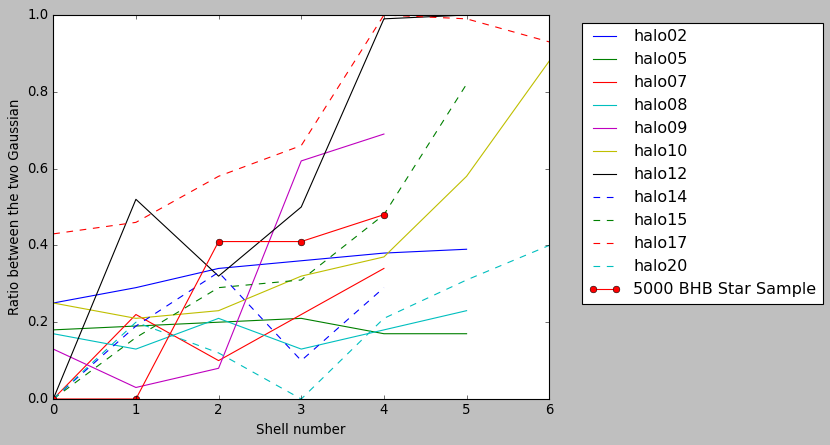

In [81]:
plt.plot(range(0,len(ratio02)),ratio02,label='halo02')
plt.plot(range(0,len(ratio05)),ratio05,label='halo05')
plt.plot(range(0,len(ratio07)),ratio07,label='halo07')
plt.plot(range(0,len(ratio08)),ratio08,label='halo08')
plt.plot(range(0,len(ratio09)),ratio09,label='halo09')
plt.plot(range(0,len(ratio10)),ratio10,label='halo10')
plt.plot(range(0,len(ratio12)),ratio12,label='halo12')
plt.plot(range(0,len(ratio14)),ratio14,label='halo14',linestyle='--')
plt.plot(range(0,len(ratio15)),ratio15,label='halo15',linestyle='--')
plt.plot(range(0,len(ratio17)),ratio17,label='halo17',linestyle='--')
plt.plot(range(0,len(ratio20)),ratio20,label='halo20',linestyle='--')
plt.plot(range(0,len(bhb)),bhb,'-o',c='r',label='5000 BHB Star Sample')

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Shell number')
plt.ylabel('Ratio between the two Gaussian')
plt.show()

In [82]:
distance=[20, 26, 32, 38, 44, 60]

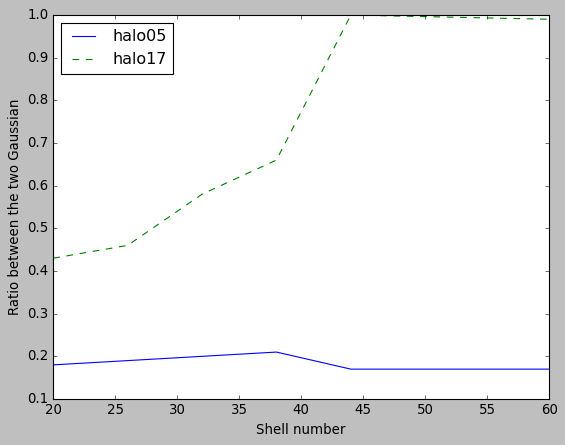

In [83]:

plt.plot(distance,ratio05,label='halo05')

plt.plot(distance,ratio17[:-1],label='halo17',linestyle='--')

#plt.plot(range(0,len(bhb)),bhb,'-o',c='r',label='5000 BHB Star Sample')

plt.legend(loc='upper left')
plt.xlabel('Shell number')
plt.ylabel('Ratio between the two Gaussian')
plt.savefig('twohalo_ratio.pdf')
plt.show()



In [84]:
ratio15= [0,0.08,0.065,0.2,0.485,0.54]
ratio17 = [0.066,0.248,0.21,0.35,0.60,0.86]
ratio02= [0.04,0.14,0.11,0.235,0.15,0.18]
ratio07 = [0,0.005,0.025,0.15,0.17,0.4]
ratio08=[0,0,0.018,0.04,0.038,0.12]
ratio09=[0,0.004,0.003,0.158,0,0.15]
ratio10=[0.006,0.00025,0.075,0.27,0.64]
ratio05=[0,0.001,0.055,0.106,0.17,0.35]
ratio12=[0,0.007,0.03,0.2,0.3,0.275]
ratio14=[0,0.0002,0.07,0.03,0.175,0.54]
ratio20=[0,0.008,0.075,0.0175,0.2,0.12]

In [85]:
halo02n=[3352,2645,1899,1553,2246,1087,832]

halo02r=[ 0.11226569, 0.26735632, 0.3315086 , 0.41551691, 0.1367007, 0.21207883, 0.77154532]
halo15n=[1229,1033,996,896,2001,1818,5024]
halo15r=[0.00768063, 0.07395562, 0.13210389, 0.30264653,0.66445984, 0.64008966, 0.85650593]

halo07n=[2249,1701,1101,704,1089,487,329]
halo07r=[8.93490915e-04,0.01466189, 0.02832804, 0.07058665, 0.36267071, 0.42318045, 0.15732188]
halo08n=[782,706,692,643,1702,1362,1778]
halo08r=[2.34580552e-03,0.01622102,0.04986217,0.04814297, 0.17340797,0.21006749, 0.92598777]
halo09n=[2044,1982,1766,1449,2243,838]
halo09r=[4.99337683e-04,5.73318526e-04, 1.89283324e-03,0.01047164, 0.16779006,0.13336278]
halo10n=[908,914,854,662,1900,1046,644]
halo10r=[0.01914279, 0.03215331, 0.09491916, 0.17290443, 0.29669413, 0.5255845 , 0.89809732]


halo12n=[1127,1033,712,514,1185,1057,1028]
halo12r=[7.01872572e-04,0.04931714,0.04470885, 0.16198113, 0.2691253, 0.36010711,0.59064516]
halo17n=[2198,2539,2693,2777,5117,1841,1152]
halo17r=[0.15284449,0.39664975, 0.3719344,0.50267505,0.73965208,0.91472673, 0.82724647]
halo14n=[1181,1010,795,695,1633,1242,658]
halo14r=[4.01317951e-03, 2.54864086e-03,0.03857401, 0.09590868, 0.23633774, 0.76530617, 0.5576129]

halo05n=[1738,1591,1503,1239,2147,1006,712]
halo05r=[0.00560735, 0.02567606,  0.10651295,  0.13902096, 0.11447793, 0.29236057, 0.35587791]
halo20n=[1401,1339,1221,1213,2083,1002,836]
halo20r=[9.35772304e-03, 7.06771334e-03,4.04415113e-03,  2.52816694e-02, 8.27857589e-02, 4.99997491e-01, 4.21919683e-01]


In [90]:
error06=np.array([[[0.15529187, 0.15930736, 0.16577078, 0.16787904, 0.17000555,
         0.17659339, 0.18071892],
        [0.39671679, 0.401972  , 0.4109024 , 0.41388117, 0.4168938 ,
         0.42601735, 0.43128021],
        [0.39908179, 0.40664676, 0.41944773, 0.42363046, 0.4277638 ,
         0.4402859 , 0.44786234],
        [0.49268321, 0.50338089, 0.52031614, 0.52598761, 0.53151372,
         0.5485776 , 0.559108  ],
        [0.26861253, 0.28857163, 0.32320188, 0.33521319, 0.34722607,
         0.38473681, 0.40970766],
        [0.19866529, 0.21960564, 0.25502875, 0.26699363, 0.27915281,
         0.31693742, 0.34332284],
        [0.77060786, 0.78368568, 0.8042893 , 0.81084164, 0.81748661,
         0.83719949, 0.8493115 ]],
[[1.75259037e-05, 2.98547824e-04, 3.47136304e-03, 5.55697049e-03,
         7.73334237e-03, 1.46613960e-02, 1.92721469e-02],
        [2.94300716e-02, 3.48070979e-02, 4.44879836e-02, 4.78580381e-02,
         5.14122606e-02, 6.27033736e-02, 7.04250132e-02],
        [1.51090763e-01, 1.58960382e-01, 1.72015703e-01, 1.76467861e-01,
         1.80997065e-01, 1.94293138e-01, 2.02760056e-01],
        [1.99780899e-01, 2.09723816e-01, 2.27116506e-01, 2.32757145e-01,
         2.38564002e-01, 2.56533209e-01, 2.67833146e-01],
        [1.51149139e-01, 1.62788951e-01, 1.82763584e-01, 1.89598961e-01,
         1.96423666e-01, 2.17955672e-01, 2.31242103e-01],
        [8.31360380e-02, 1.11012359e-01, 1.63094189e-01, 1.84865165e-01,
         2.09359218e-01, 2.98246697e-01, 3.50014550e-01],
        [1.05771452e-02, 6.43840690e-02, 1.94290983e-01, 2.35918397e-01,
         2.77804059e-01, 3.96651088e-01, 4.66473366e-01]],
[[4.84552994e-06, 1.44349456e-04, 1.90398983e-03, 3.27751559e-03,
         5.12534492e-03, 1.29961329e-02, 1.90019444e-02],
        [1.96295600e-04, 1.89717773e-03, 1.40555925e-02, 1.95041753e-02,
         2.53949555e-02, 4.42636353e-02, 5.68094801e-02],
        [1.29085522e-04, 1.46053424e-03, 1.50063834e-02, 2.32014131e-02,
         3.23790591e-02, 6.35514617e-02, 8.41735283e-02],
        [5.21502606e-02, 6.46305808e-02, 8.58316615e-02, 9.29450488e-02,
         1.00347503e-01, 1.22936001e-01, 1.37689998e-01],
        [4.20935116e-01, 4.42697971e-01, 4.77109296e-01, 4.88712833e-01,
         5.00297425e-01, 5.33955231e-01, 5.56606576e-01],
        [3.76948483e-01, 4.25882927e-01, 5.13105225e-01, 5.45116234e-01,
         5.78369011e-01, 6.78861343e-01, 7.31761297e-01],
        [2.19589868e-03, 1.80359312e-02, 1.49261930e-01, 2.30101086e-01,
         3.24536524e-01, 5.95343260e-01, 7.19656927e-01]],
[[-8.93133009e-06, -8.93133009e-06,  7.04453440e-06,
          1.07647625e-05,  1.40696526e-05,  3.84814649e-05,
          3.84814649e-05],
        [ 1.62322631e-02,  2.77341330e-02,  4.83569883e-02,
          5.53523690e-02,  6.27709092e-02,  8.59187579e-02,
          1.00210716e-01],
        [ 4.94154024e-02,  6.11204344e-02,  8.04318176e-02,
          8.70619055e-02,  9.40590812e-02,  1.16052191e-01,
          1.30757955e-01],
        [ 5.62475213e-02,  6.83552476e-02,  9.02701834e-02,
          9.83242262e-02,  1.06334108e-01,  1.32439144e-01,
          1.49042357e-01],
        [ 2.62275749e-01,  2.73964169e-01,  2.94527991e-01,
          3.01369531e-01,  3.08125477e-01,  3.29235232e-01,
          3.41537631e-01],
        [ 2.66834821e-01,  2.83642283e-01,  3.14157943e-01,
          3.24136738e-01,  3.33960581e-01,  3.62999693e-01,
          3.81121363e-01],
        [ 9.49550434e-01,  9.50871498e-01,  9.53003039e-01,
          9.53687748e-01,  9.54404056e-01,  9.56451149e-01,
          9.57649321e-01]],
[[1.71088677e-05, 3.36142353e-04, 3.66694083e-03, 5.25732568e-03,
         6.81493486e-03, 1.16558215e-02, 1.53476454e-02],
        [1.33795359e-05, 2.04448337e-04, 2.68348133e-03, 4.52416218e-03,
         6.98714901e-03, 1.70662526e-02, 2.42062122e-02],
        [1.61076796e-05, 2.83881906e-04, 3.77187787e-03, 6.66957781e-03,
         1.06064793e-02, 2.66244992e-02, 3.77439476e-02],
        [4.71903562e-03, 1.45682818e-02, 3.25474248e-02, 3.96914688e-02,
         4.75050538e-02, 7.54980144e-02, 9.53310490e-02],
        [1.15254656e-01, 1.43440366e-01, 1.92255967e-01, 2.08082498e-01,
         2.23544495e-01, 2.67676646e-01, 2.92566580e-01],
        [1.18153250e-02, 4.23747037e-02, 1.06010351e-01, 1.31332686e-01,
         1.58438609e-01, 2.44987533e-01, 2.93967073e-01]],
[[0.04385967, 0.05172805, 0.06432088, 0.06855221, 0.07293147,
         0.08611688, 0.09421133],
        [0.06221769, 0.07051976, 0.08390058, 0.08844562, 0.09302783,
         0.10718813, 0.11631338],
        [0.12580409, 0.13487394, 0.15028906, 0.15536248, 0.16062499,
         0.17693197, 0.18714011],
        [0.24643101, 0.25975104, 0.28174784, 0.28921035, 0.29661512,
         0.31923082, 0.33277529],
        [0.45369223, 0.46353243, 0.48010767, 0.48550439, 0.49095937,
         0.50755183, 0.51733461],
        [0.58660454, 0.60239955, 0.62815766, 0.63643444, 0.64487549,
         0.66918058, 0.68395647],
        [0.91711565, 0.92481554, 0.93677151, 0.94051881, 0.94411304,
         0.95411155, 0.95951678]],
[[1.17863528e-06, 1.05710895e-04, 1.38894090e-03, 2.47034848e-03,
         3.93849113e-03, 1.08859756e-02, 1.68954576e-02],
        [2.01347986e-03, 8.67511342e-03, 2.84332045e-02, 3.58500681e-02,
         4.32401301e-02, 6.49755380e-02, 7.73242240e-02],
        [4.39537474e-02, 6.25837939e-02, 9.42332931e-02, 1.05037422e-01,
         1.16500569e-01, 1.50378810e-01, 1.70796338e-01],
        [3.25883511e-01, 3.40115001e-01, 3.63497305e-01, 3.71251838e-01,
         3.79031460e-01, 4.02577512e-01, 4.17339777e-01],
        [3.49721052e-01, 3.60259542e-01, 3.77927658e-01, 3.83755889e-01,
         3.89510869e-01, 4.07570130e-01, 4.18379199e-01],
        [3.43117878e-01, 3.61640380e-01, 3.91920786e-01, 4.02121113e-01,
         4.12450504e-01, 4.43610982e-01, 4.63357033e-01],
        [6.05593913e-01, 6.24568060e-01, 6.57640507e-01, 6.69209440e-01,
         6.81061526e-01, 7.17134686e-01, 7.37948379e-01]],
[[6.47746229e-05, 6.78103217e-04, 5.00519015e-03, 6.56467051e-03,
         8.52569908e-03, 1.86470163e-02, 2.64019069e-02],
        [4.99964850e-01, 4.99964850e-01, 4.99975435e-01, 4.99979376e-01,
         4.99986323e-01, 4.99997117e-01, 4.99997117e-01],
        [4.04015120e-02, 5.35292677e-02, 7.69121674e-02, 8.51162017e-02,
         9.36216793e-02, 1.19617516e-01, 1.35468200e-01],
        [9.73959240e-02, 1.11267876e-01, 1.36172067e-01, 1.44638152e-01,
         1.53180410e-01, 1.79696858e-01, 1.97015121e-01],
        [3.77955571e-01, 3.89575036e-01, 4.09088119e-01, 4.15665228e-01,
         4.22141878e-01, 4.41588469e-01, 4.52854852e-01],
        [8.61118783e-01, 8.66116796e-01, 8.74970880e-01, 8.77756946e-01,
         8.80517909e-01, 8.88793289e-01, 8.93873467e-01],
        [5.90306398e-01, 6.27996449e-01, 6.83866044e-01, 7.01696026e-01,
         7.18403846e-01, 7.66508010e-01, 7.93105634e-01]],
[[0.01677693, 0.02325256, 0.03370088, 0.03731119, 0.04105089,
         0.05253551, 0.05974817],
        [0.12566356, 0.13490653, 0.14896468, 0.15367136, 0.15838863,
         0.17306618, 0.18225216],
        [0.18819295, 0.19804123, 0.2138156 , 0.21899891, 0.22418894,
         0.24043502, 0.2502784 ],
        [0.39508155, 0.40605542, 0.42347569, 0.42929343, 0.43507183,
         0.45268469, 0.46372904],
        [0.69012903, 0.69989527, 0.71524941, 0.72018958, 0.72521959,
         0.73967451, 0.74860989],
        [0.73699056, 0.74096238, 0.74721637, 0.749273  , 0.75127092,
         0.75749186, 0.76101887],
        [0.80985819, 0.81244526, 0.81659799, 0.81798875, 0.81934055,
         0.82345846, 0.82599736]],
[[0.2819501 , 0.28596027, 0.29250857, 0.29470871, 0.29695699,
         0.3035899 , 0.30756202],
        [0.55944803, 0.56277453, 0.5683238 , 0.57016166, 0.57200102,
         0.57748569, 0.58086007],
        [0.50211727, 0.5066889 , 0.51358246, 0.51590643, 0.51820837,
         0.52528334, 0.52933982],
        [0.57202031, 0.57669688, 0.58414528, 0.5866142 , 0.58904397,
         0.59624078, 0.60074395],
        [0.76444426, 0.76744011, 0.77244571, 0.77409142, 0.77577162,
         0.78072605, 0.78392633],
        [0.93997989, 0.94397091, 0.9504339 , 0.95245511, 0.95440142,
         0.95994737, 0.96314162],
        [0.89347857, 0.898475  , 0.90609931, 0.90858743, 0.91098891,
         0.91821745, 0.92268573]],
 [[3.38587689e-04, 2.83454440e-03, 8.82993786e-03, 1.08022916e-02,
         1.28664773e-02, 2.03727029e-02, 2.64049217e-02],
        [5.65992054e-03, 1.46857983e-02, 2.97401379e-02, 3.47475069e-02,
         3.98494615e-02, 5.56097023e-02, 6.52366643e-02],
        [1.23473499e-04, 1.27235460e-03, 1.17910416e-02, 1.68582751e-02,
         2.23097007e-02, 4.05068986e-02, 5.30570264e-02],
        [7.79910348e-04, 6.62773398e-03, 2.90857077e-02, 3.79418404e-02,
         4.72062719e-02, 7.71734357e-02, 9.41416560e-02],
        [8.60939323e-02, 9.79235967e-02, 1.18172547e-01, 1.25068550e-01,
         1.32091621e-01, 1.53396538e-01, 1.67523621e-01],
        [1.19708081e-01, 1.38049147e-01, 1.68850331e-01, 1.79600493e-01,
         1.90772376e-01, 2.26631010e-01, 2.50307464e-01],
        [3.48729809e-01, 3.78698522e-01, 4.27543062e-01, 4.43919776e-01,
         4.59804953e-01, 5.09170200e-01, 5.37210260e-01]]])

error18=np.array([[[0.06829326, 0.06979651, 0.07224509, 0.07304969, 0.0738435 ,
         0.0762597 , 0.07777791],
        [0.15098753, 0.15326729, 0.15725365, 0.15858133, 0.15989332,
         0.16391701, 0.16652621],
        [0.25670868, 0.26172563, 0.2698529 , 0.27258425, 0.27530297,
         0.28372536, 0.28921814],
        [0.32422229, 0.33119926, 0.34246611, 0.34617253, 0.34997504,
         0.3615146 , 0.36850385],
        [0.18090601, 0.19033064, 0.20623098, 0.21164328, 0.21708168,
         0.23234233, 0.24043992],
        [0.10339439, 0.11232133, 0.12764405, 0.13317316, 0.13888162,
         0.15727301, 0.17081475],
        [0.63940491, 0.65070471, 0.66803644, 0.67385034, 0.67956895,
         0.69680851, 0.70702228]],
 [[0.00085516, 0.00204281, 0.00383276, 0.00444589, 0.00506883,
         0.00709997, 0.00836108],
        [0.01064434, 0.01279002, 0.01643196, 0.01768658, 0.01898685,
         0.02295268, 0.02562091],
        [0.05948144, 0.06236968, 0.06699629, 0.0685907 , 0.07015685,
         0.07497101, 0.07813476],
        [0.08866288, 0.09206212, 0.09793519, 0.09984387, 0.10184781,
         0.10787331, 0.11162241],
        [0.06950868, 0.07373983, 0.08099042, 0.08349252, 0.08606264,
         0.09432951, 0.09945938],
        [0.05460646, 0.06609164, 0.10593899, 0.12028529, 0.13014506,
         0.15346146, 0.16564269],
        [0.0731269 , 0.09329787, 0.13515004, 0.14994269, 0.16530311,
         0.20843494, 0.23218758]],
[[-8.19278080e-06,  9.20751135e-06,  2.57857154e-04,
          5.61391858e-04,  1.28048309e-03,  5.92762666e-03,
          8.26084813e-03],
        [ 1.93427631e-04,  1.79478191e-03,  6.68570795e-03,
          8.38716435e-03,  1.00995165e-02,  1.56063995e-02,
          1.92780194e-02],
        [ 6.14849550e-05,  5.88750887e-04,  5.92646969e-03,
          8.94238106e-03,  1.22118146e-02,  2.21586676e-02,
          2.87241206e-02],
        [ 2.33088470e-02,  2.75808897e-02,  3.53066371e-02,
          3.80796482e-02,  4.09689060e-02,  5.02652359e-02,
          5.60340109e-02],
        [ 2.48832181e-01,  2.58700031e-01,  2.76561517e-01,
          2.82697285e-01,  2.88875448e-01,  3.07769623e-01,
          3.19927144e-01],
        [ 2.75136136e-01,  2.89988858e-01,  3.15537712e-01,
          3.23976172e-01,  3.32477183e-01,  3.59062772e-01,
          3.75532554e-01],
        [ 1.99284631e-01,  1.99284631e-01,  1.99298883e-01,
          1.99300845e-01,  1.99307761e-01,  1.99324005e-01,
          1.99324005e-01]],
[[-6.17726697e-06,  2.80949800e-05,  5.14508516e-04,
          9.50966142e-04,  1.57341521e-03,  4.26378574e-03,
          6.05929046e-03],
        [ 7.54426690e-05,  8.43794039e-04,  5.31112922e-03,
          6.92517184e-03,  8.62526700e-03,  1.40735178e-02,
          1.74639408e-02],
        [ 1.83922461e-02,  2.19020643e-02,  2.79787915e-02,
          3.01544312e-02,  3.23652661e-02,  3.92283367e-02,
          4.37212843e-02],
        [ 7.52547918e-03,  1.13531732e-02,  1.84631684e-02,
          2.09843428e-02,  2.36480482e-02,  3.24335797e-02,
          3.80023042e-02],
        [ 8.37568823e-02,  8.73070493e-02,  9.31304076e-02,
          9.51212133e-02,  9.71202882e-02,  1.03388584e-01,
          1.07145533e-01],
        [ 1.05543218e-01,  1.12466404e-01,  1.24779258e-01,
          1.29122896e-01,  1.33610466e-01,  1.47642880e-01,
          1.56890716e-01],
        [ 8.73513140e-01,  8.74563431e-01,  8.76276645e-01,
          8.76840144e-01,  8.77400378e-01,  8.79038250e-01,
          8.80079046e-01]],
[[-8.93942207e-06, -5.88733523e-08,  1.18683486e-04,
          2.17036338e-04,  3.71265948e-04,  1.24414684e-03,
          1.97642301e-03],
        [-8.78271834e-06,  2.95119444e-06,  1.48710192e-04,
          2.77743353e-04,  4.59232066e-04,  1.47356769e-03,
          2.69604067e-03],
        [-5.77088728e-06,  3.42871973e-05,  5.39411916e-04,
          9.94986317e-04,  1.65586552e-03,  4.85867654e-03,
          7.43650495e-03],
        [ 1.41957390e-05,  2.61754068e-04,  3.33903530e-03,
          5.16651326e-03,  8.18944448e-03,  1.93643002e-02,
          2.52044919e-02],
        [ 8.45704750e-02,  9.30253295e-02,  1.04750138e-01,
          1.08631491e-01,  1.12418384e-01,  1.23742729e-01,
          1.30257867e-01],
        [ 6.96168623e-02,  9.15303524e-02,  1.18610957e-01,
          1.26836587e-01,  1.34793887e-01,  1.57540605e-01,
          1.72398558e-01]],
[[0.00104844, 0.00273057, 0.00540685, 0.00632146, 0.00723376,
         0.01012222, 0.01199212],
        [0.00387408, 0.00651505, 0.01091523, 0.01240977, 0.0139742 ,
         0.0189035 , 0.0220777 ],
        [0.03786312, 0.0407651 , 0.04603396, 0.04787704, 0.04963277,
         0.05513651, 0.05853932],
        [0.08383124, 0.08900557, 0.09749573, 0.1003826 , 0.10326374,
         0.11202908, 0.11756246],
        [0.18316264, 0.18733997, 0.19336896, 0.19542776, 0.19747899,
         0.20370516, 0.20764694],
        [0.37690574, 0.38499306, 0.39837492, 0.40285554, 0.40729574,
         0.42056367, 0.42932707],
        [0.85523314, 0.86038113, 0.86897349, 0.87182229, 0.87454208,
         0.88255788, 0.88700758]],
[[-8.97260016e-06,  2.00656185e-06,  1.42939981e-04,
          2.68676993e-04,  4.55615947e-04,  1.60993290e-03,
          3.12869169e-03],
        [ 2.37461920e-02,  2.81386767e-02,  3.60791933e-02,
          3.86286827e-02,  4.11998741e-02,  4.86639276e-02,
          5.30518320e-02],
        [ 1.86644743e-02,  2.27310946e-02,  2.99890305e-02,
          3.26090657e-02,  3.53540794e-02,  4.42114831e-02,
          5.05430498e-02],
        [ 6.93304427e-02,  7.34317094e-02,  8.06198344e-02,
          8.30231206e-02,  8.54310044e-02,  9.28725434e-02,
          9.75645936e-02],
        [ 1.74727293e-01,  1.78381319e-01,  1.84529700e-01,
          1.86570519e-01,  1.88584208e-01,  1.94735367e-01,
          1.98807726e-01],
        [ 3.80209865e-01,  3.95185604e-01,  4.19896925e-01,
          4.28021225e-01,  4.36086591e-01,  4.60732177e-01,
          4.74974305e-01],
        [ 5.71860817e-01,  5.96331712e-01,  6.37713212e-01,
          6.51388787e-01,  6.65129953e-01,  7.04141555e-01,
          7.27033525e-01]],
[[-6.73708760e-06,  2.54329830e-05,  4.38719173e-04,
          8.19287059e-04,  1.38792695e-03,  4.21560010e-03,
          6.27903627e-03],
        [ 5.02069754e-07,  9.20894472e-05,  1.33278578e-03,
          2.26214692e-03,  3.40296030e-03,  7.84770961e-03,
          1.11690620e-02],
        [ 1.63174820e-02,  1.99197607e-02,  2.59747162e-02,
          2.80327702e-02,  3.01661205e-02,  3.68256795e-02,
          4.11884001e-02],
        [ 3.36552065e-02,  3.89984208e-02,  4.80347164e-02,
          5.10560086e-02,  5.41289042e-02,  6.34941067e-02,
          6.91504985e-02],
        [ 1.46529262e-01,  1.50811054e-01,  1.57655580e-01,
          1.59965357e-01,  1.62242042e-01,  1.69450490e-01,
          1.73908739e-01],
        [ 6.32082944e-01,  6.36201591e-01,  6.42547440e-01,
          6.44660313e-01,  6.46763898e-01,  6.53037489e-01,
          6.56835567e-01],
        [ 5.18576122e-01,  5.47310902e-01,  5.93718563e-01,
          6.09233716e-01,  6.24968933e-01,  6.70454079e-01,
          6.97005584e-01]],
[[-8.53245961e-06,  8.11823214e-06,  2.41087596e-04,
          4.39368956e-04,  7.21899555e-04,  2.09545653e-03,
          3.37780621e-03],
        [ 1.96167352e-02,  2.17613212e-02,  2.53761137e-02,
          2.66139374e-02,  2.78759928e-02,  3.18032057e-02,
          3.42338417e-02],
        [ 6.12068699e-02,  6.43853241e-02,  6.96188661e-02,
          7.13750118e-02,  7.31437682e-02,  7.84300307e-02,
          8.19611814e-02],
        [ 1.85057269e-01,  1.88882544e-01,  1.95309453e-01,
          1.97425591e-01,  1.99581436e-01,  2.06026459e-01,
          2.09937427e-01],
        [ 5.85838812e-01,  5.89364063e-01,  5.94895200e-01,
          5.96720110e-01,  5.98561153e-01,  6.04187674e-01,
          6.07735295e-01],
        [ 4.85297084e-01,  4.86849580e-01,  4.89456319e-01,
          4.90338086e-01,  4.91197650e-01,  4.93767959e-01,
          4.95379516e-01],
        [ 9.17009141e-01,  9.19730742e-01,  9.24093223e-01,
          9.25498845e-01,  9.26845960e-01,  9.30732712e-01,
          9.33103503e-01]],
[[0.07394945, 0.07544895, 0.07783477, 0.07861906, 0.07940387,
         0.08177507, 0.08325642],
        [0.25886394, 0.26061126, 0.26347039, 0.26437308, 0.26530295,
         0.2681102 , 0.26977062],
        [0.25575781, 0.25810307, 0.26162979, 0.26283096, 0.26402583,
         0.26762992, 0.26987197],
        [0.42956275, 0.43176756, 0.43560799, 0.43691724, 0.4381538 ,
         0.44202138, 0.44435643],
        [0.71426544, 0.71718464, 0.72185584, 0.72339517, 0.72492428,
         0.7295511 , 0.73242893],
        [0.89605826, 0.89879023, 0.90325744, 0.90468769, 0.90610805,
         0.91019423, 0.91252333],
        [0.68018331, 0.68360796, 0.68908028, 0.69089685, 0.69274546,
         0.69818578, 0.70142422]],
[[ 3.31960361e-06,  1.18498584e-04,  1.32620094e-03,
          1.88892190e-03,  2.49163522e-03,  4.77371403e-03,
          6.58063706e-03],
        [-4.41509193e-06,  4.52612167e-05,  7.42207404e-04,
          1.33803550e-03,  2.14264627e-03,  5.23440099e-03,
          7.41251272e-03],
        [-4.01603791e-06,  4.09503971e-05,  6.70372956e-04,
          1.29638915e-03,  2.19780269e-03,  5.69883240e-03,
          8.11592709e-03],
        [ 3.93439988e-03,  6.42421537e-03,  1.06957298e-02,
          1.22311334e-02,  1.38364291e-02,  1.90201007e-02,
          2.24704404e-02],
        [ 5.58280100e-02,  6.19467599e-02,  7.24028572e-02,
          7.61075932e-02,  7.99242101e-02,  9.22154507e-02,
          1.00644815e-01],
        [ 1.17518845e-01,  1.23916517e-01,  1.33830172e-01,
          1.37148834e-01,  1.40492392e-01,  1.50680874e-01,
          1.57134932e-01],
        [ 3.40667795e-01,  3.48450017e-01,  3.61597664e-01,
          3.66011499e-01,  3.70324818e-01,  3.83635409e-01,
          3.92062013e-01]]])




In [94]:
error06t=[]
for ii in range(0,len(error06)):
    error06t.append(error06[ii][:,3])
error18t=[]
for ii in range(0,len(error18)):
    error18t.append(error18[ii][:,3])    

In [97]:
error06t,error18t

([array([0.16787904, 0.41388117, 0.42363046, 0.52598761, 0.33521319,
         0.26699363, 0.81084164]),
  array([0.00555697, 0.04785804, 0.17646786, 0.23275714, 0.18959896,
         0.18486516, 0.2359184 ]),
  array([0.00327752, 0.01950418, 0.02320141, 0.09294505, 0.48871283,
         0.54511623, 0.23010109]),
  array([1.07647625e-05, 5.53523690e-02, 8.70619055e-02, 9.83242262e-02,
         3.01369531e-01, 3.24136738e-01, 9.53687748e-01]),
  array([0.00525733, 0.00452416, 0.00666958, 0.03969147, 0.2080825 ,
         0.13133269]),
  array([0.06855221, 0.08844562, 0.15536248, 0.28921035, 0.48550439,
         0.63643444, 0.94051881]),
  array([0.00247035, 0.03585007, 0.10503742, 0.37125184, 0.38375589,
         0.40212111, 0.66920944]),
  array([0.00656467, 0.49997938, 0.0851162 , 0.14463815, 0.41566523,
         0.87775695, 0.70169603]),
  array([0.03731119, 0.15367136, 0.21899891, 0.42929343, 0.72018958,
         0.749273  , 0.81798875]),
  array([0.29470871, 0.57016166, 0.51590643, 0.5

In [98]:
r0618=np.array(error06t)/np.array(error18t)

In [69]:
radius=[20,26,32,38,44,60,76]

In [70]:
def funcreg(xdata):
    reg = linear_model.LinearRegression()
    reg.fit(np.array(range(0,len(xdata))).reshape(-1,1),np.array(xdata).reshape(-1,1))
    diabetes_y_pred = reg.predict(np.array(range(0,len(xdata))).reshape(-1,1))
    #reg.coef_
    print ('1',reg.coef_)
    return reg.coef_,diabetes_y_pred
#array([0.5, 0.5])

In [71]:
coeff = []
coeff2 = []
yfun = [] 
ratioa=[]
ratiob=[]
#ratiot= [halo02r,halo05r,halo07r,halo08r,halo09r,halo10r,halo12r,halo14r,halo15r,halo17r,halo20r]

ratiot=error06t
for item in ratiot:
    ran = np.array(range(0,len(item)))
    ratioa.append(funcreg(np.array(item)[ran < 2])[0])
    ratiob.append(funcreg(np.array(item)[ran > 2])[0])
    yfun.append(funcreg(item)[1])
    coeff.append(funcreg(item)[0])
    #coeff2.append(ratiob-ratioa)

1 [[0.24600213]]
1 [[0.07863425]]
1 [[0.05523912]]
1 [[0.05523912]]
1 [[0.04230107]]
1 [[0.000475]]
1 [[0.03493677]]
1 [[0.03493677]]
1 [[0.01622666]]
1 [[0.04678715]]
1 [[0.07847165]]
1 [[0.07847165]]
1 [[0.0553416]]
1 [[0.25888578]]
1 [[0.1290324]]
1 [[0.1290324]]
1 [[-0.00073316]]
1 [[0.04582061]]
1 [[0.03640211]]
1 [[0.03640211]]
1 [[0.01989341]]
1 [[0.21048554]]
1 [[0.14435783]]
1 [[0.14435783]]
1 [[0.03337972]]
1 [[0.0912238]]
1 [[0.10755278]]
1 [[0.10755278]]
1 [[0.49341471]]
1 [[0.21332653]]
1 [[0.11326779]]
1 [[0.11326779]]
1 [[0.11636017]]
1 [[0.11951694]]
1 [[0.14408667]]
1 [[0.14408667]]
1 [[0.27545295]]
1 [[0.11442834]]
1 [[0.10230029]]
1 [[0.10230029]]
1 [[0.02394522]]
1 [[0.12724657]]
1 [[0.06061674]]
1 [[0.06061674]]


In [65]:
ratioa,ratiob

([array([[0.08553164]]),
  array([[0.01324069]]),
  array([[0.00782577]]),
  array([[0.00597421]]),
  array([[6.0707015e-05]]),
  array([[0.00608831]]),
  array([[0.03836001]]),
  array([[0.00144286]]),
  array([[0.02617457]]),
  array([[0.18575402]]),
  array([[-0.00055089]])],
 [array([[0.09045633]]),
  array([[0.01870892]]),
  array([[0.05249425]]),
  array([[0.26015691]]),
  array([[0.06083504]]),
  array([[0.25217468]]),
  array([[0.19465477]]),
  array([[0.21592281]]),
  array([[0.20778377]]),
  array([[0.09432313]]),
  array([[0.11223823]])])

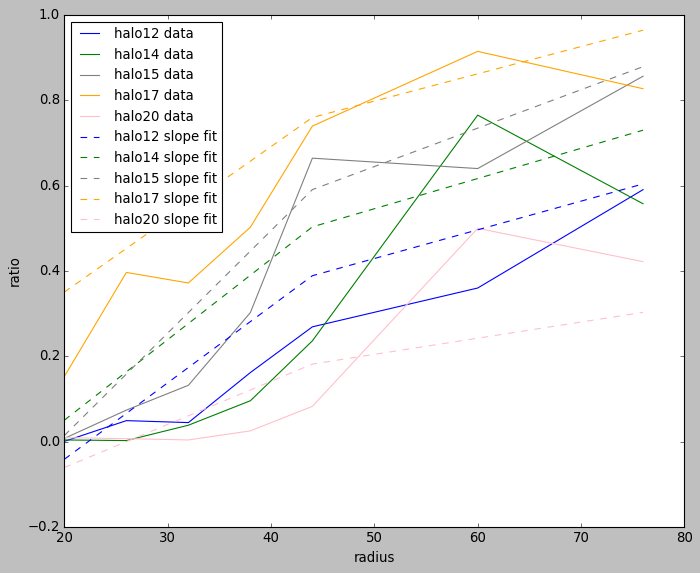

In [50]:
plt.figure(figsize=(10, 8), dpi=80)


plt.plot(radius,halo12r,label = 'halo12 data')
plt.plot(radius,halo14r,label = 'halo14 data',c='g')
plt.plot(radius,halo15r,label = 'halo15 data',c='grey')
plt.plot(radius,halo17r,label = 'halo17 data',c='orange')
plt.plot(radius,halo20r,label = 'halo20 data',c='pink')


plt.plot(radius,yfun[-5],label = 'halo12 slope fit',linestyle='--',c='b')
plt.plot(radius,yfun[-4],label = 'halo14 slope fit',linestyle='--',c='g')
plt.plot(radius,yfun[-3],label = 'halo15 slope fit',linestyle='--',c='grey')
plt.plot(radius,yfun[-2],label = 'halo17 slope fit',linestyle='--',c='orange')
plt.plot(radius,yfun[-1],label = 'halo20 slope fit',linestyle='--',c='pink')


plt.xlabel('radius')
plt.ylabel('ratio')
plt.legend(prop={ 'size':12},loc=2)
plt.savefig('Ratio.pdf')
plt.show()


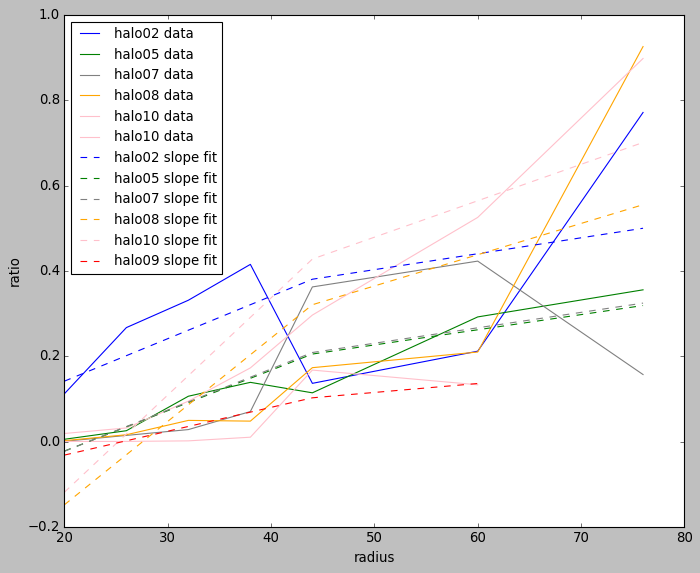

In [125]:
plt.figure(figsize=(10, 8), dpi=80)


plt.plot(radius,halo02r,label = 'halo02 data')
plt.plot(radius,halo05r,label = 'halo05 data',c='g')
plt.plot(radius,halo07r,label = 'halo07 data',c='grey')
plt.plot(radius,halo08r,label = 'halo08 data',c='orange')
plt.plot(radius,halo10r,label = 'halo10 data',c='pink')
plt.plot(radius[:6],halo09r,label = 'halo10 data',c='pink')

plt.plot(radius,yfun[0],label = 'halo02 slope fit',linestyle='--',c='b')
plt.plot(radius,yfun[1],label = 'halo05 slope fit',linestyle='--',c='g')
plt.plot(radius,yfun[2],label = 'halo07 slope fit',linestyle='--',c='grey')
plt.plot(radius,yfun[3],label = 'halo08 slope fit',linestyle='--',c='orange')
plt.plot(radius,yfun[-6],label = 'halo10 slope fit',linestyle='--',c='pink')
plt.plot(radius[:6],yfun[-7],label = 'halo09 slope fit',linestyle='--',c='r')


plt.xlabel('radius')
plt.ylabel('ratio')
plt.legend(prop={ 'size':12},loc=2)
plt.savefig('Ratio.pdf')
plt.show()

In [ ]:
plt.figure(figsize=(10, 8), dpi=80)


plt.plot(radius,halo02r,label = 'halo02 data')
plt.plot(radius,halo05r,label = 'halo05 data')
plt.plot(radius,halo07r,label = 'halo07 data')
plt.plot(radius,halo08r,label = 'halo08 data')
plt.plot(radius,halo10r,label = 'halo10 data')
plt.plot(radius,halo12r,label = 'halo12 data')
plt.plot(radius,halo14r,label = 'halo14 data')
plt.plot(radius,halo15r,label = 'halo15 data')
plt.plot(radius,halo17r,label = 'halo17 data')
plt.plot(radius,halo20r,label = 'halo20 data')

plt.xlabel('radius')
plt.ylabel('ratio')
plt.legend(prop={ 'size':12},loc=2)
plt.savefig('Ratio.pdf')
plt.show()

In [100]:
np.array(error18t)

array([array([0.07304969, 0.15858133, 0.27258425, 0.34617253, 0.21164328,
              0.13317316, 0.67385034])                                   ,
       array([0.00444589, 0.01768658, 0.0685907 , 0.09984387, 0.08349252,
              0.12028529, 0.14994269])                                   ,
       array([0.00056139, 0.00838716, 0.00894238, 0.03807965, 0.28269729,
              0.32397617, 0.19930085])                                   ,
       array([0.00095097, 0.00692517, 0.03015443, 0.02098434, 0.09512121,
              0.1291229 , 0.87684014])                                   ,
       array([0.00021704, 0.00027774, 0.00099499, 0.00516651, 0.10863149,
              0.12683659])                                               ,
       array([0.00632146, 0.01240977, 0.04787704, 0.1003826 , 0.19542776,
              0.40285554, 0.87182229])                                   ,
       array([2.68676993e-04, 3.86286827e-02, 3.26090657e-02, 8.30231206e-02,
              1.86570519e-01

/Users/Jenny/thesis_idea_test/autograd/autograd/autograd/numpy/numpy_wrapper.py:77: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return _np.array(args, *array_args, **array_kwargs)


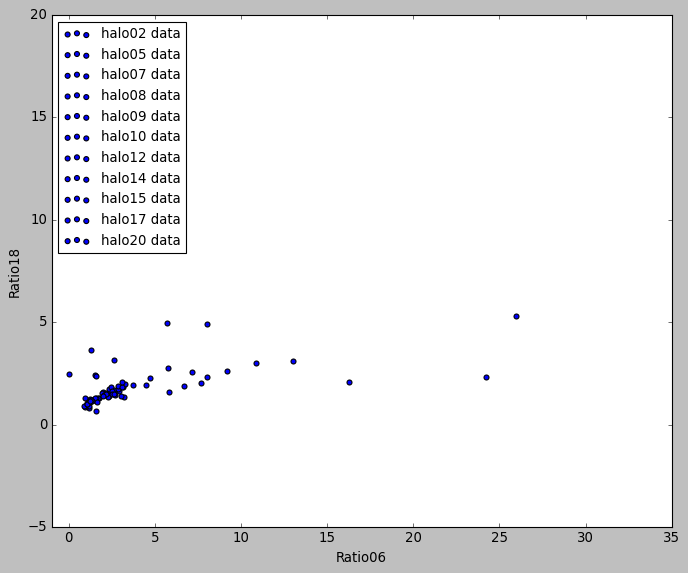

In [109]:
plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(r0618[0],halo02r/np.array(error18t)[0],label = 'halo02 data')
plt.scatter(r0618[1],halo05r/np.array(error18t)[1],label = 'halo05 data')
plt.scatter(r0618[2],halo07r/np.array(error18t)[2],label = 'halo07 data')
plt.scatter(r0618[3],halo08r/np.array(error18t)[3],label = 'halo08 data')
plt.scatter(r0618[4],halo09r/np.array(error18t)[4],label = 'halo09 data')
plt.scatter(r0618[5],halo10r/np.array(error18t)[5],label = 'halo10 data')
plt.scatter(r0618[6],halo12r/np.array(error18t)[6],label = 'halo12 data')
plt.scatter(r0618[7],halo14r/np.array(error18t)[7],label = 'halo14 data')
plt.scatter(r0618[8],halo15r/np.array(error18t)[8],label = 'halo15 data')
plt.scatter(r0618[9],halo17r/np.array(error18t)[9],label = 'halo17 data')
plt.scatter(r0618[10],halo20r/np.array(error18t)[10],label = 'halo20 data')
plt.xlabel('Ratio06')
plt.ylabel('Ratio18')
plt.xlim(-1,35)
plt.legend(prop={'size':12},loc=2)
plt.savefig('Ratio_ratio.pdf')


In [55]:
np.ravel(coeff)

array([0.05973129, 0.05686235, 0.05788089, 0.11722017, 0.03355846,
       0.13662503, 0.09342237, 0.12085993, 0.15039643, 0.12239563,
       0.05971662])

In [30]:
#80% Halo Accretion time: gives the look-back accretion time for satellites that contributed the first 80% ofthe final mass ofthe stellar halo. Col.

#80% Halo Accumutaion time: gives the look-back time for the first 80% of the stellar halo to be in place (unbound from satellites of origin). Col. (11) gives the percentage of material in the stellar halo that was originally bound to surviving

#Last >10% Merger (Gyr)

colorhalonum = [2,5,7,8,9,10,12,14,15,17,20]


In [51]:
halomw = [457387870000.0,
 445162100000.0,
 454637900000.0,
 503832540000.0,
 391691340000.0,
 564544300000.0,
 269356120000.0,
 523812730000.0,
 497537740000.0,
 552228800000.0,
 502499700000.0]
halomwt = [78785675000.0,
 0.0,
 723060030.0,
 4542150000.0,
 30521760000.0,
 50549996.0,
 108026620000.0,
 807047000.0,
 66750636000.0,
 202780300000.0,
 11529089000.0]
halomw1= [123063000000.0,
 392399980000.0,
 140438000000.0,
 210361990000.0,
 186416000000.0,
 113505000000.0,
 86592004000.0,
 225342010000.0,
 107996000000.0,
 105930000000.0,
 163350000000.0]
halomwt2=[378602160000.0,
 445162100000.0,
 451818880000.0,
 499290370000.0,
 361169600000.0,
 564493750000.0,
 161329510000.0,
 523005660000.0,
 430787130000.0,
 349448500000.0,
 490970580000.0]

halomwj  = [0.40389475,
 0.43111458,
 0.40207958,
 0.48978657,
 0.40730497,
 0.42163157,
 0.4632317,
 0.41507575,
 0.43388566,
 0.4315352,
 0.4597554]
halomwmd = [112253060000.0,
 62488224000.0,
 96963570000.0,
 110543920000.0,
 93536560000.0,
 91901680000.0,
 76075614000.0,
 79154610000.0,
 87700850000.0,
 102354180000.0,
 95717960000.0]
halomwmd2=[280830000000.0,
 164002000000.0,
 249860000000.0,
 209072980000.0,
 216401990000.0,
 220319990000.0,
 175440000000.0,
 203776980000.0,
 190690000000.0,
 219351990000.0,
 195766000000.0]

In [52]:
halodiff2=[504128080000.0,
 847332970000.0,
 496338930000.0,
 759774050000.0,
 580703000000.0,
 597347140000.0,
 327820000000.0,
 596339000000.0,
 695478000000.0,
 647269900000.0,
 704181000000.0]

In [53]:
halomj=[457387870000.0,
 445162100000.0,
 454637900000.0,
 503832540000.0,
 391691340000.0,
 564544300000.0,
 269356120000.0,
 523812730000.0,
 497537740000.0,
 552228800000.0,
 502499700000.0]

In [54]:
coeff=np.ravel(coeff)[:-1]

In [55]:
#split into two groups 
#range between 20% 80% distribution of the mass 
# pure averaging circularity by number plot 


ValueError: x and y must be the same size

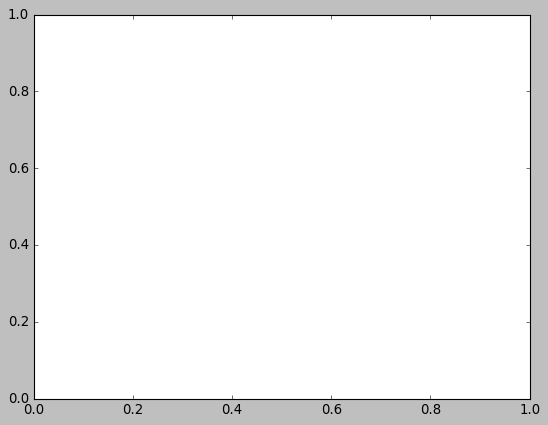

In [56]:
#satellite * circularity 
plt.scatter(finalmass,coeff,marker='o',s=50)

#cb = plt.colorbar()
#loc = np.arange(0,max(label),max(label)/float(len(colors)))
#cb.set_ticks(loc)
#cb.set_ticklabels(colors)
plt.ylabel('Slope of the Ratio')
plt.xlabel('80% Halo Accretion Time')
plt.show()

In [57]:
coeff2

[]

ValueError: x and y must be the same size

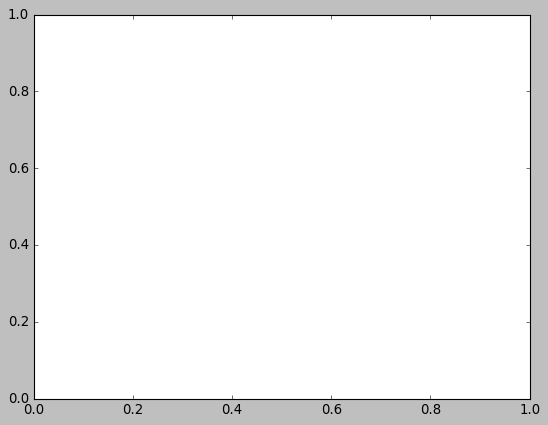

In [58]:
plt.scatter(finalmass,coeff,c=np.array(colorhalonum),marker='o',s=50)

cb = plt.colorbar()
#loc = np.arange(0,max(label),max(label)/float(len(colors)))
#cb.set_ticks(loc)
#cb.set_ticklabels(colors)
plt.ylabel('Slope of the Ratio')
plt.xlabel('80% Halo Accretion Time (look back time) (Gyr)')
plt.show()

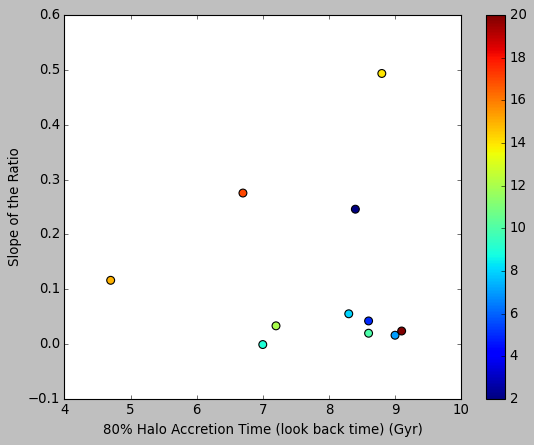

In [59]:
plt.scatter(finalmass,ratioa,c=np.array(colorhalonum),marker='o',s=50)

cb = plt.colorbar()
#loc = np.arange(0,max(label),max(label)/float(len(colors)))
#cb.set_ticks(loc)
#cb.set_ticklabels(colors)
plt.ylabel('Slope of the Ratio')
plt.xlabel('80% Halo Accretion Time (look back time) (Gyr)')
plt.show()

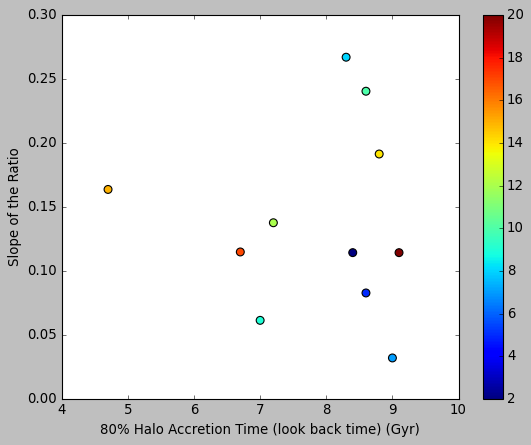

In [129]:
plt.scatter(finalmass,ratiob,c=np.array(colorhalonum),marker='o',s=50)

cb = plt.colorbar()
#loc = np.arange(0,max(label),max(label)/float(len(colors)))
#cb.set_ticks(loc)
#cb.set_ticklabels(colors)
plt.ylabel('Slope of the Ratio')
plt.xlabel('80% Halo Accretion Time (look back time) (Gyr)')
plt.show()

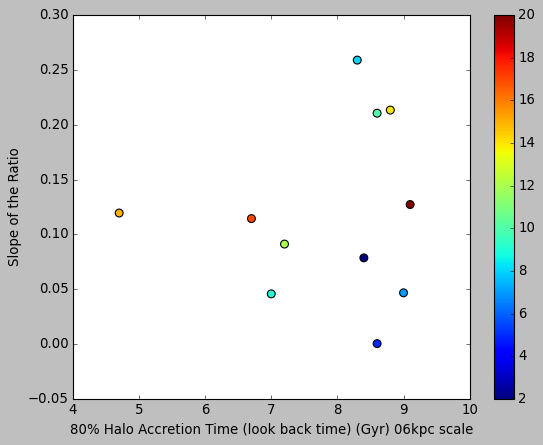

In [72]:
plt.scatter(finalmass,ratiob,c=np.array(colorhalonum),marker='o',s=50)

cb = plt.colorbar()
#loc = np.arange(0,max(label),max(label)/float(len(colors)))
#cb.set_ticks(loc)
#cb.set_ticklabels(colors)
plt.ylabel('Slope of the Ratio')
plt.xlabel('80% Halo Accretion Time (look back time) (Gyr) 06kpc scale')
plt.show()

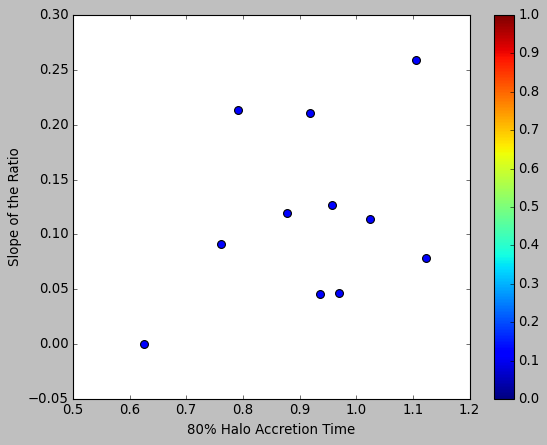

In [73]:
#satellite 20-80% mass distribution weighted by circularity 
plt.scatter(np.array(halomwmd)/1e11,ratiob,marker='o',s=50)

cb = plt.colorbar()
#loc = np.arange(0,max(label),max(label)/float(len(colors)))
#cb.set_ticks(loc)
#cb.set_ticklabels(colors)
plt.ylabel('Slope of the Ratio')
plt.xlabel('80% Halo Accretion Time')
plt.show()

In [ ]:
plt.scatter(finalmass,ratiob,c=np.array(colorhalonum),marker='o',s=50)

cb = plt.colorbar()
#loc = np.arange(0,max(label),max(label)/float(len(colors)))
#cb.set_ticks(loc)
#cb.set_ticklabels(colors)
plt.ylabel('Slope of the Ratio')
plt.xlabel('80% Halo Accretion Time (look back time) (Gyr) 18kpc scale')
plt.show()

In [21]:
len(coeff2)

12

In [16]:
#time average mass
plt.scatter(finalmass,coeff2[:-1],c=np.array(halotime)/1e10,marker='o',s=50)

cb = plt.colorbar()
#loc = np.arange(0,max(label),max(label)/float(len(colors)))
#cb.set_ticks(loc)
#cb.set_ticklabels(colors)
plt.ylabel('Slope of the Ratio')
plt.xlabel('80% Halo Accretion Time')
plt.show()

NameError: name 'finalmass' is not defined

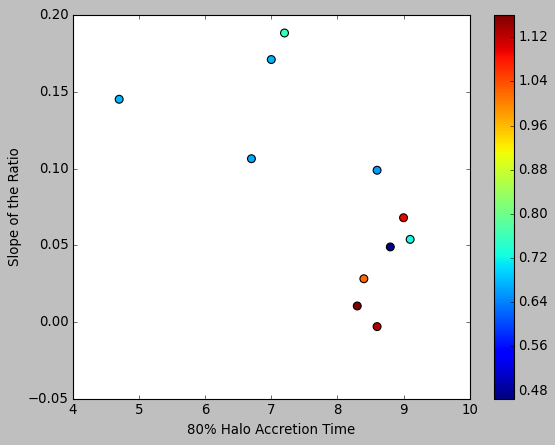

In [44]:
#time average mass
plt.scatter(finalmass,coeff,c=np.array(halotime)/1e10,marker='o',s=50)

cb = plt.colorbar()
#loc = np.arange(0,max(label),max(label)/float(len(colors)))
#cb.set_ticks(loc)
#cb.set_ticklabels(colors)
plt.ylabel('Slope of the Ratio')
plt.xlabel('80% Halo Accretion Time')
plt.show()

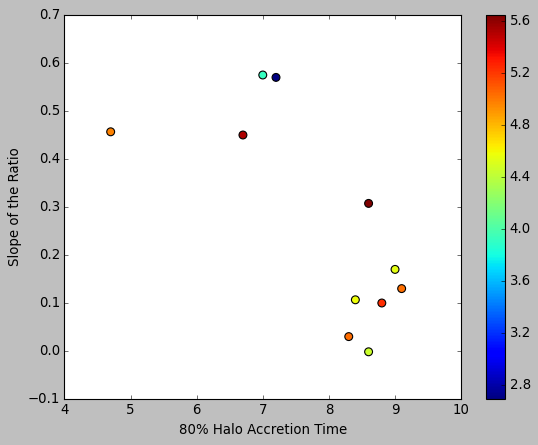

In [61]:
#satellite * circularity with tsat< 7.5 gyr
plt.scatter(finalmass,coeff2[:-1],c=np.array(halomw)/1e11,marker='o',s=50)

cb = plt.colorbar()
#loc = np.arange(0,max(label),max(label)/float(len(colors)))
#cb.set_ticks(loc)
#cb.set_ticklabels(colors)
plt.ylabel('Slope of the Ratio')
plt.xlabel('80% Halo Accretion Time')
plt.show()

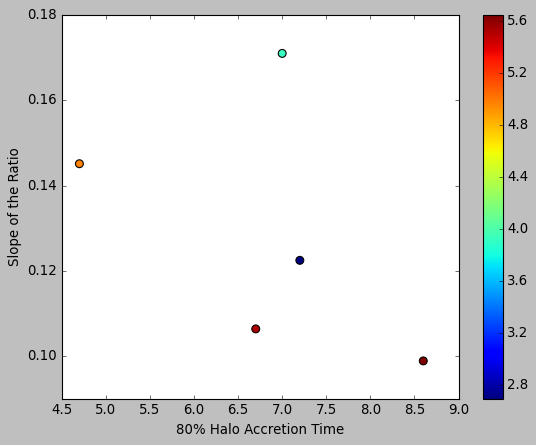

In [89]:
#satellite * circularity with tsat< 7.5 gyr
plt.scatter(np.array(finalmass)[coeff > 0.09],coeff[coeff > 0.09],c=np.array(halomw)[coeff > 0.09]/1e11, marker='o',s=50)

cb = plt.colorbar()
#loc = np.arange(0,max(label),max(label)/float(len(colors)))
#cb.set_ticks(loc)
#cb.set_ticklabels(colors)
plt.ylabel('Slope of the Ratio')
plt.xlabel('80% Halo Accretion Time')
plt.show()

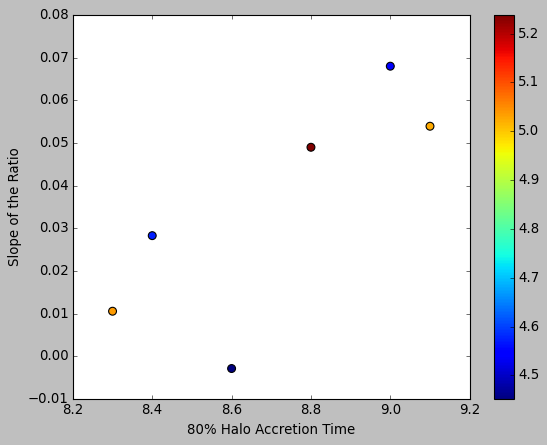

In [90]:
#satellite * circularity with tsat< 7.5 gyr
plt.scatter(np.array(finalmass)[coeff < 0.09],coeff[coeff < 0.09],c=np.array(halomw)[coeff < 0.09]/1e11, marker='o',s=50)

cb = plt.colorbar()
#loc = np.arange(0,max(label),max(label)/float(len(colors)))
#cb.set_ticks(loc)
#cb.set_ticklabels(colors)
plt.ylabel('Slope of the Ratio')
plt.xlabel('80% Halo Accretion Time')
plt.show()

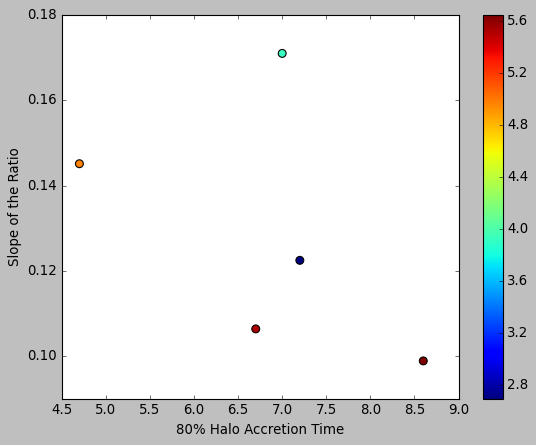

In [96]:
#satellite * circularity 
plt.scatter(np.array(finalmass)[coeff > 0.09],coeff[coeff > 0.09],c=np.array(halomj)[coeff > 0.09]/1e11, marker='o',s=50)

cb = plt.colorbar()
#loc = np.arange(0,max(label),max(label)/float(len(colors)))
#cb.set_ticks(loc)
#cb.set_ticklabels(colors)
plt.ylabel('Slope of the Ratio')
plt.xlabel('80% Halo Accretion Time')
plt.show()

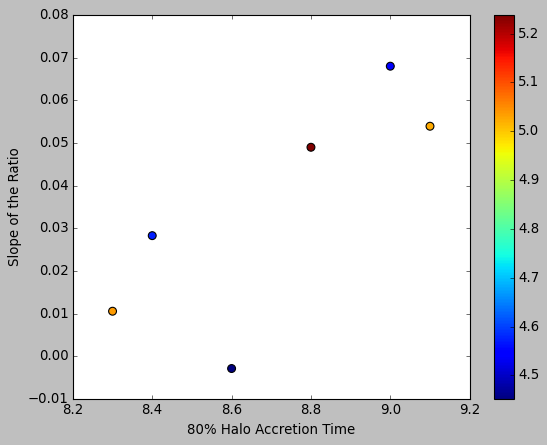

In [97]:
#satellite * circularity 
plt.scatter(np.array(finalmass)[coeff < 0.09],coeff[coeff < 0.09],c=np.array(halomj)[coeff < 0.09]/1e11, marker='o',s=50)

cb = plt.colorbar()
#loc = np.arange(0,max(label),max(label)/float(len(colors)))
#cb.set_ticks(loc)
#cb.set_ticklabels(colors)
plt.ylabel('Slope of the Ratio')
plt.xlabel('80% Halo Accretion Time')
plt.show()

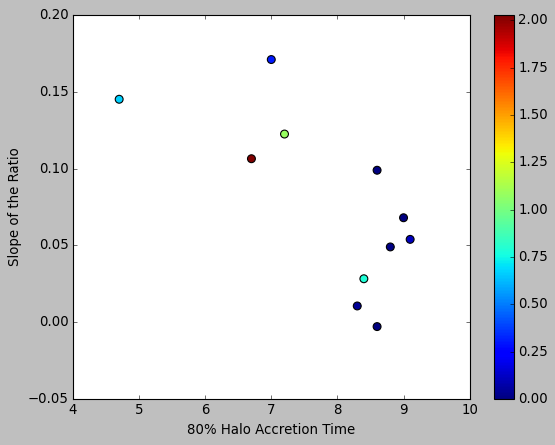

In [32]:
#satellite * circularity with tsat< 7.5 gyr
plt.scatter(finalmass,coeff[:-1],c=np.array(halomwt)/1e11,marker='o',s=50)

cb = plt.colorbar()
#loc = np.arange(0,max(label),max(label)/float(len(colors)))
#cb.set_ticks(loc)
#cb.set_ticklabels(colors)
plt.ylabel('Slope of the Ratio')
plt.xlabel('80% Halo Accretion Time')
plt.show()

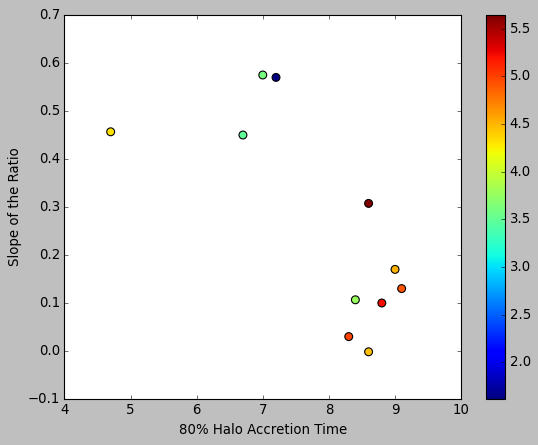

In [65]:
#satellite * circularity with tsat > 7.5 gyr
plt.scatter(finalmass,coeff2[:-1],c=np.array(halomwt2)/1e11,marker='o',s=50)

cb = plt.colorbar()
#loc = np.arange(0,max(label),max(label)/float(len(colors)))
#cb.set_ticks(loc)
#cb.set_ticklabels(colors)
plt.ylabel('Slope of the Ratio')
plt.xlabel('80% Halo Accretion Time')
plt.show()

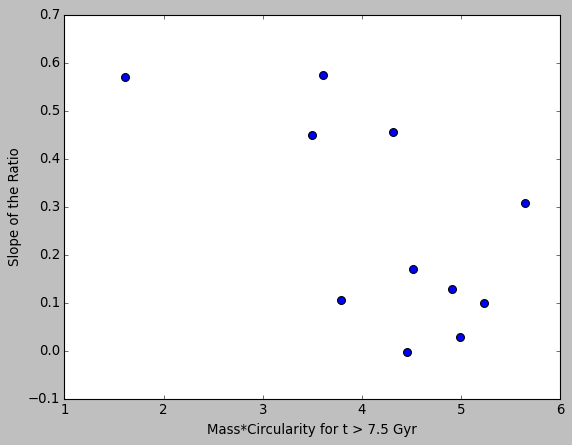

In [76]:
#mass*circularity t > 7.5 gyr
plt.scatter(np.array(halomwt2)/1e11,coeff2[:-1],marker='o',s=50)

#cb = plt.colorbar()
#loc = np.arange(0,max(label),max(label)/float(len(colors)))
#cb.set_ticks(loc)
#cb.set_ticklabels(colors)
plt.ylabel('Slope of the Ratio')
plt.xlabel('Mass*Circularity for t > 7.5 Gyr')
plt.show()

In [79]:
#mass*circularity t < 7.5 gyr
plt.scatter(np.array(halomwd)/1e11,coeff2[:-1],marker='o',s=50)

#cb = plt.colorbar()
#loc = np.arange(0,max(label),max(label)/float(len(colors)))
#cb.set_ticks(loc)
#cb.set_ticklabels(colors)
plt.ylabel('Slope of the Ratio')
plt.xlabel('Mass*Circularity for t < 7.5 Gyr')
plt.show()

NameError: name 'halomwd' is not defined

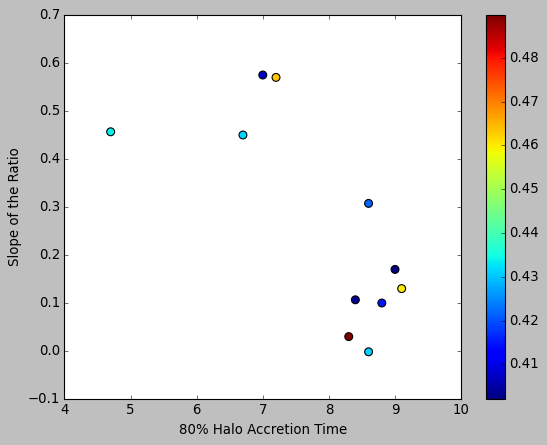

In [66]:
#mean circularity 
plt.scatter(finalmass,coeff2[:-1],c=halomwj,marker='o',s=50)

cb = plt.colorbar()
#loc = np.arange(0,max(label),max(label)/float(len(colors)))
#cb.set_ticks(loc)
#cb.set_ticklabels(colors)
plt.ylabel('Slope of the Ratio')
plt.xlabel('80% Halo Accretion Time')
plt.show()

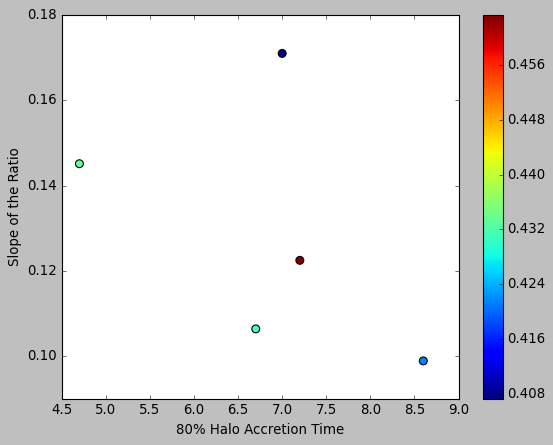

In [93]:
#mean circularity 
plt.scatter(np.array(finalmass)[coeff > 0.09],coeff[coeff > 0.09],c=np.array(halomwj)[coeff > 0.09],marker='o',s=50)

cb = plt.colorbar()
#loc = np.arange(0,max(label),max(label)/float(len(colors)))
#cb.set_ticks(loc)
#cb.set_ticklabels(colors)
plt.ylabel('Slope of the Ratio')
plt.xlabel('80% Halo Accretion Time')
plt.show()

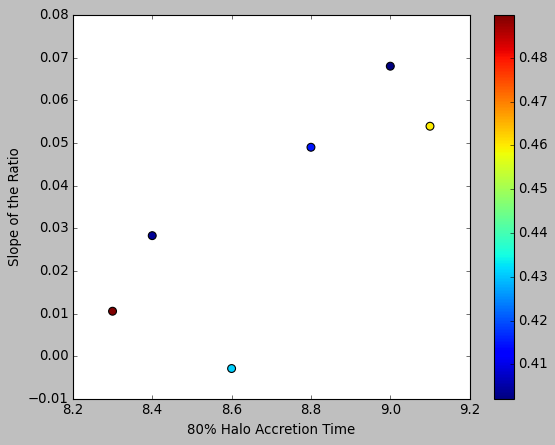

In [94]:
#mean circularity 
plt.scatter(np.array(finalmass)[coeff < 0.09],coeff[coeff < 0.09],c=np.array(halomwj)[coeff < 0.09],marker='o',s=50)

cb = plt.colorbar()
#loc = np.arange(0,max(label),max(label)/float(len(colors)))
#cb.set_ticks(loc)
#cb.set_ticklabels(colors)
plt.ylabel('Slope of the Ratio')
plt.xlabel('80% Halo Accretion Time')
plt.show()

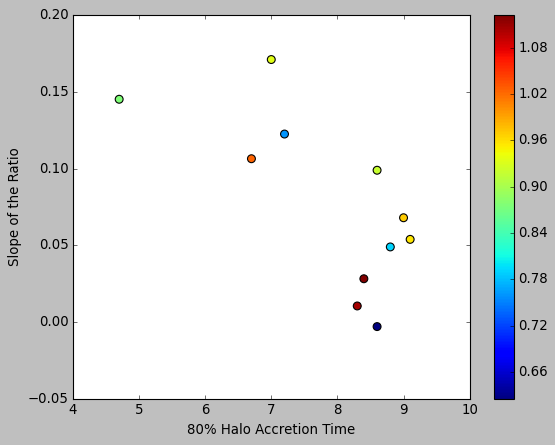

In [48]:
#satellite 20-80% mass distribution weighted by circularity 
plt.scatter(finalmass,coeff[:-1],c=np.array(halomwmd)/1e11,marker='o',s=50)

cb = plt.colorbar()
#loc = np.arange(0,max(label),max(label)/float(len(colors)))
#cb.set_ticks(loc)
#cb.set_ticklabels(colors)
plt.ylabel('Slope of the Ratio')
plt.xlabel('80% Halo Accretion Time')
plt.show()

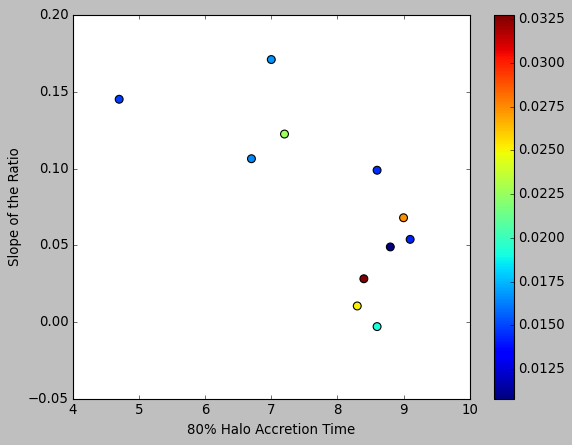

In [61]:
#mean circularity 
plt.scatter(finalmass,coeff[:-1],c=halodiff,marker='o',s=50)

cb = plt.colorbar()
#loc = np.arange(0,max(label),max(label)/float(len(colors)))
#cb.set_ticks(loc)
#cb.set_ticklabels(colors)
plt.ylabel('Slope of the Ratio')
plt.xlabel('80% Halo Accretion Time')
plt.show()

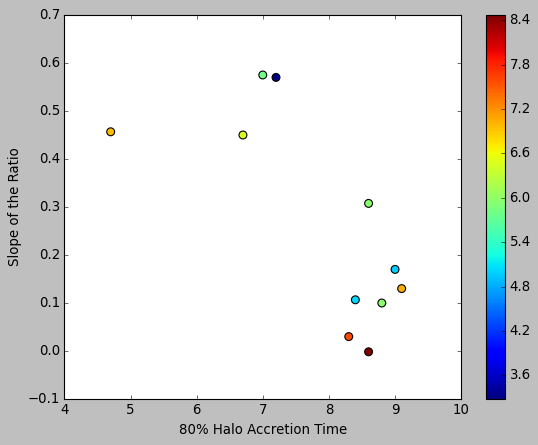

In [63]:
#difference in 20%-80% mass 
plt.scatter(finalmass,coeff2[:-1],c=np.array(halodiff2)/1e11,marker='o',s=50)

cb = plt.colorbar()
#loc = np.arange(0,max(label),max(label)/float(len(colors)))
#cb.set_ticks(loc)
#cb.set_ticklabels(colors)
plt.ylabel('Slope of the Ratio')
plt.xlabel('80% Halo Accretion Time')
plt.show()

In [60]:
halom3=[127000000000.0,
400000000000.0,
142000000000.0,
214000000000.0,
191000000000.0,
115000000000.0,
71400000000.0,
234000000000.0,
116000000000.0,
107000000000.0,
165000000000.0]
halo4 = [59800000000.0,
26500000000.0,
9470000000.0,
14600000000.0,
37500000000.0,
3370000000.0,
88000000000.0,
6180000000.0,
91000000000.0,
92100000000.0,
21400000000.0]
halodiff=[3274421000.0,
 1912767600.0,
 2735818800.0,
 2515588900.0,
 1676949000.0,
 1452836500.0,
 2262950400.0,
 1078261500.0,
 1481928700.0,
 1644797200.0,
 1422742500.0]

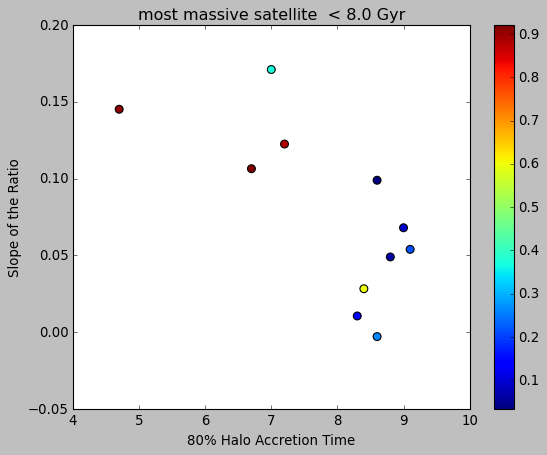

In [58]:
#most massive satellite  <8.0 gyr
plt.scatter(finalmass,coeff[:-1],c=np.array(halo4)/1e11,marker='o',s=50)

cb = plt.colorbar()
#loc = np.arange(0,max(label),max(label)/float(len(colors)))
#cb.set_ticks(loc)
#cb.set_ticklabels(colors)
plt.ylabel('Slope of the Ratio')
plt.xlabel('80% Halo Accretion Time')
plt.title('most massive satellite  < 8.0 Gyr')
plt.show()

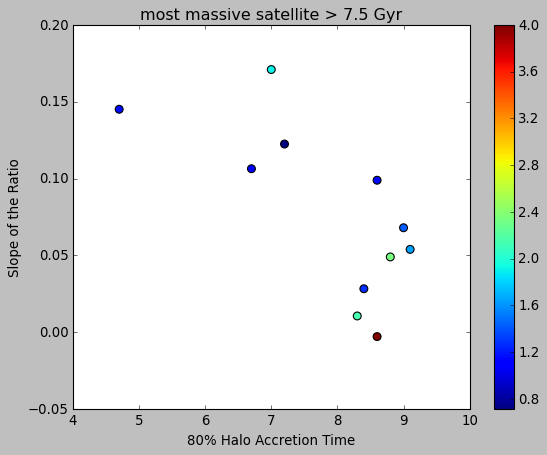

In [59]:
#most massive satellite  > 7.5 gyr
plt.scatter(finalmass,coeff[:-1],c=np.array(halom3)/1e11,marker='o',s=50)

cb = plt.colorbar()
#loc = np.arange(0,max(label),max(label)/float(len(colors)))
#cb.set_ticks(loc)
#cb.set_ticklabels(colors)
plt.ylabel('Slope of the Ratio')
plt.xlabel('80% Halo Accretion Time')
plt.title('most massive satellite > 7.5 Gyr')
plt.show()

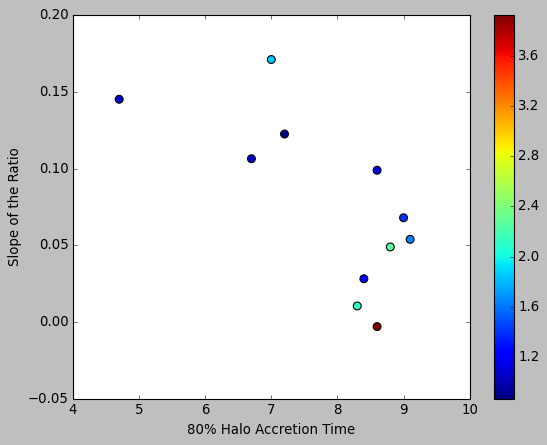

In [36]:
#most massive satellite  circularity 
plt.scatter(finalmass,coeff[:-1],c=np.array(halomw1)/1e11,marker='o',s=50)

cb = plt.colorbar()
#loc = np.arange(0,max(label),max(label)/float(len(colors)))
#cb.set_ticks(loc)
#cb.set_ticklabels(colors)
plt.ylabel('Slope of the Ratio')
plt.xlabel('80% Halo Accretion Time')
plt.show()

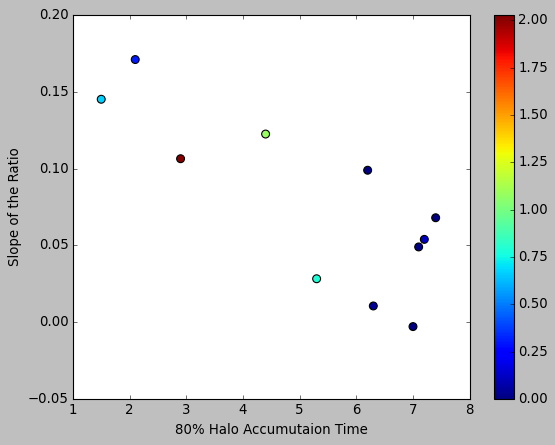

In [33]:
plt.scatter(accutime,coeff[:-1],c=np.array(halomwt)/1e11,marker='o',s=50)

cb = plt.colorbar()
#loc = np.arange(0,max(label),max(label)/float(len(colors)))
#cb.set_ticks(loc)
#cb.set_ticklabels(colors)
plt.ylabel('Slope of the Ratio')
plt.xlabel('80% Halo Accumutaion Time')
plt.show()

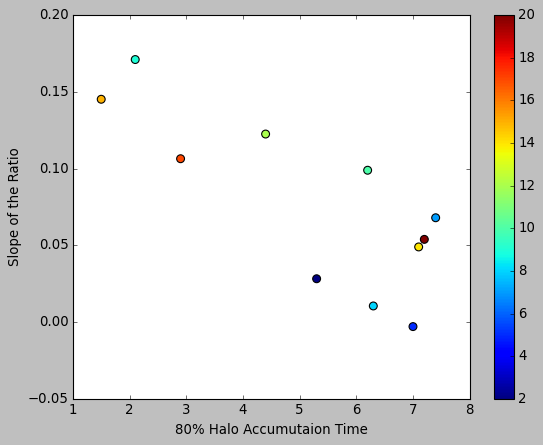

In [37]:
plt.scatter(accutime,coeff[:-1],c=np.array(
colorhalonum),marker='o',s=50)

cb = plt.colorbar()
#loc = np.arange(0,max(label),max(label)/float(len(colors)))
#cb.set_ticks(loc)
#cb.set_ticklabels(colors)
plt.ylabel('Slope of the Ratio')
plt.xlabel('80% Halo Accumutaion Time')
plt.show()

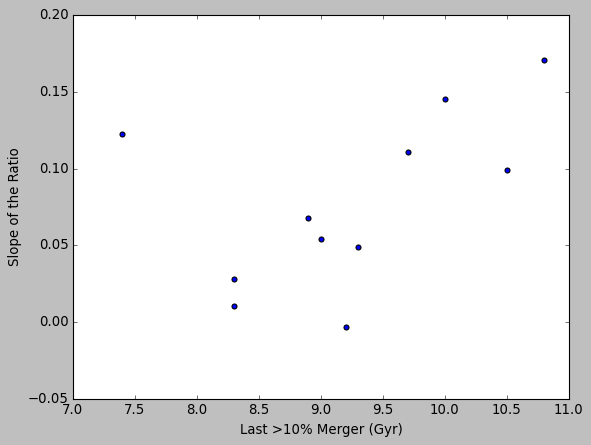

In [58]:
plt.scatter(lm,coeff[:-1])
plt.ylabel('Slope of the Ratio')
plt.xlabel('Last >10% Merger (Gyr)')
plt.show()

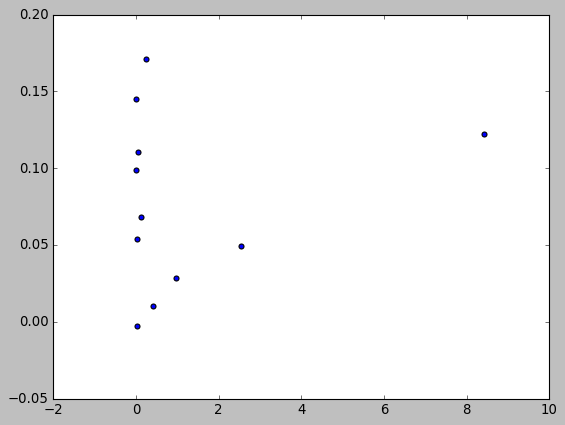

In [42]:
plt.scatter(phss,coeff)
plt.show()

In [34]:
print (funcreg(ratio12))

[[0.1225]]


In [31]:
aice2

[[529.9924421823083, 574.5119575424607],
 [712.2215881178724, 754.0271086426757],
 [525.0154255179514, 578.5728831203398],
 [427.6155731752449, 474.3335835974379],
 [295.8867896868903, 348.1638712668649],
 [216.25033533391002, 282.8810731759131]]

In [22]:
hess[0]

array([[ 8.25551574e-03, -4.10491650e-04,  1.24970305e-02,
         1.14218827e-02, -3.90891141e-03,  6.23352215e-03,
         1.28151416e-02],
       [-4.10491650e-04,  3.15874014e-02,  5.20847820e-03,
         1.57711039e-04,  3.50154268e-02, -9.62412965e-03,
        -2.32374093e-03],
       [ 1.24970305e-02,  5.20847820e-03,  5.73945983e-02,
         3.22032259e-02, -1.21225848e-02,  4.78061596e-02,
         4.40708812e-02],
       [ 1.14218827e-02,  1.57711039e-04,  3.22032259e-02,
         3.10921866e-02,  1.47391894e-03,  9.04321044e-02,
         8.41728719e-02],
       [-3.90891141e-03,  3.50154268e-02, -1.21225848e-02,
         1.47391894e-03,  2.38607247e-01,  6.11591133e-04,
        -1.87757562e-02],
       [ 6.23352215e-03, -9.62412965e-03,  4.78061596e-02,
         9.04321044e-02,  6.11591133e-04,  6.90052058e-01,
         7.59260489e-01],
       [ 1.28151416e-02, -2.32374093e-03,  4.40708812e-02,
         8.41728719e-02, -1.87757562e-02,  7.59260489e-01,
         1.2884439

In [585]:
import math
1/np.sqrt(2.32741642e-07)

2072.8265037288247

In [40]:
#the final hessian matrix
#using the function with snr cut will return the fraction of selected sample and the median ratio between dr14 and dr7

   
def reading_data(data,plot=True):
    
 
#data_error3 = np.loadtxt("Lyman_alpha_binning_flux_covariance_z>2.5-4.8_1075-1150_3.2base_dr14_newbin.txt")
    
    #i = range(0, len(data_dr14dr7))
    #data_indi_flux7 = np.split(data_dr14dr7[i,1], len(data_z_r7))
    #data_indi_wave7 = np.split(data_dr14dr7[i,0], len(data_z_r7))
    
    
    if plot == True:
        fig, ax = plt.subplots(3, 2, figsize=(22, 18), gridspec_kw={'wspace': 0.18, 'hspace': 0.23}, sharex=False, sharey=False)

        fig.subplots_adjust(left=0.05, bottom=0.05, right=0.9, top=0.95)
        i = 0
        #fig.text(0.5, 0.003,  r'z',fontsize =15, ha='center')
        #fig.text(0.01, 0.5, r'z', fontsize =15,va='center', rotation='vertical')
        degrees = [(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (0, 2), (1, 2), (0, 3)]
        for index in range(ax.shape[0]):
            for jndex in range(ax.shape[1]):
                #ax[index][jndex].axhline(1,alpha = 0.5)
                #ax[index][jndex].axhline(np.median(data_indi_flux[i][(1075 <data_indi_wave[i]) & (data_indi_wave[i] < 1150)][:292]/data_indi_flux7[i][(1075 <data_indi_wave7[i]) & (data_indi_wave7[i] < 1150)][:292]),c = 'r', label =  'median ratio for DR14/DR7 (1075-1150)')
                cr = ax[index][jndex].contourf(np.array(np.linalg.inv(data[i])),cmap="RdBu_r")
                cbar = fig.colorbar(cr, ax=ax[index][jndex])
                
                #cbar.ax.set_title('')
                ax[index][jndex].set_title('covariance plot for shell = '+str(i),fontsize = 15)
                #ax[index][jndex].set_xticks(np.linspace(0,282,5),np.round(data_indi_wave[i]*(1+data_z[i])/1215.67-1,3))
                #ax[index][jndex].set_yticks([0,50,100,150,200,250,281])
                #ax[index][jndex].set_xticks([0,50,100,150,200,250,281])
                #print (np.array(ax[index][jndex].get_xticks())[1])
                #print (np.array([1,2,3,4,5])[np.array(ax[index][jndex].set_xticks())])
                #ax[index][jndex].set_yticklabels(np.round(data_indi_wave[i]*(1+data_z[i])/1215.67-1,3)[np.array(ax[index][jndex].get_yticks(),dtype = int)])
                #ax[index][jndex].set_xticklabels(np.round(data_indi_wave[i]*(1+data_z[i])/1215.67-1,3)[np.array(ax[index][jndex].get_xticks(),dtype = int)])
                cbar.ax.set_title(r'sigma_ij^2', fontsize=13,loc='right')
                ax[index][jndex].set_xlabel('parameters')
                ax[index][jndex].set_ylabel('parameters')
                #ax[index][jndex].plot(np.array(data_indi_wave7[i]),data_indi_flux7[i], label=str('{:.2f}'.format(data_z_r7[i,0]))+' dr7 data')
                #ax[index][jndex].set_xlim(1075,1150)
                #ax[index][jndex].set_ylim(0.5,6.0)
        #ax[index][jndex].plot(np.array(data_indi_wave3[i]),data_indi_flux3[i], label=str('{:.2f}'.format(data_z3[i])) + ' dr12 data')
        #ax[index][jndex].plot(np.array(data_indi_wave4[i]),data_indi_flux4[i], label=str('{:.2f}'.format(data_z4[i])) + ' dr12 corrected data')
        # ax[index][jndex].axvline(rest_wave[i]*3.309,c='k',linestyle = '--',label = str(names[i]))
        # ax[index][jndex].axvline(rest_wave[i]*3.309,c='k',linestyle = '--')
        # ax[index][jndex].annotate('0.25 on axes', (0.25,4530), textcoords='data', size=20)
        #print (np.median(data_indi_flux[i][(1075 <data_indi_wave[i]) & (data_indi_wave[i] < 1150)][:292]/data_indi_flux7[i][(1075 <data_indi_wave7[i]) & (data_indi_wave7[i] < 1150)][:292]))
                #ax[index][jndex].legend()
                #ax[index][jndex].set_xlabel('wavelength')
                #ax[index][jndex].set_ylabel('flux')
        #ax[index][jndex].set_xticklabels('{:.2f}'.format(np.array(data_indi_wave[i]/1215.67*(1+data_z[i]))))


                i = i + 1
      
        plt.savefig('covariance_plot_testing1.pdf')
        plt.show(fig)
        
        
   
        


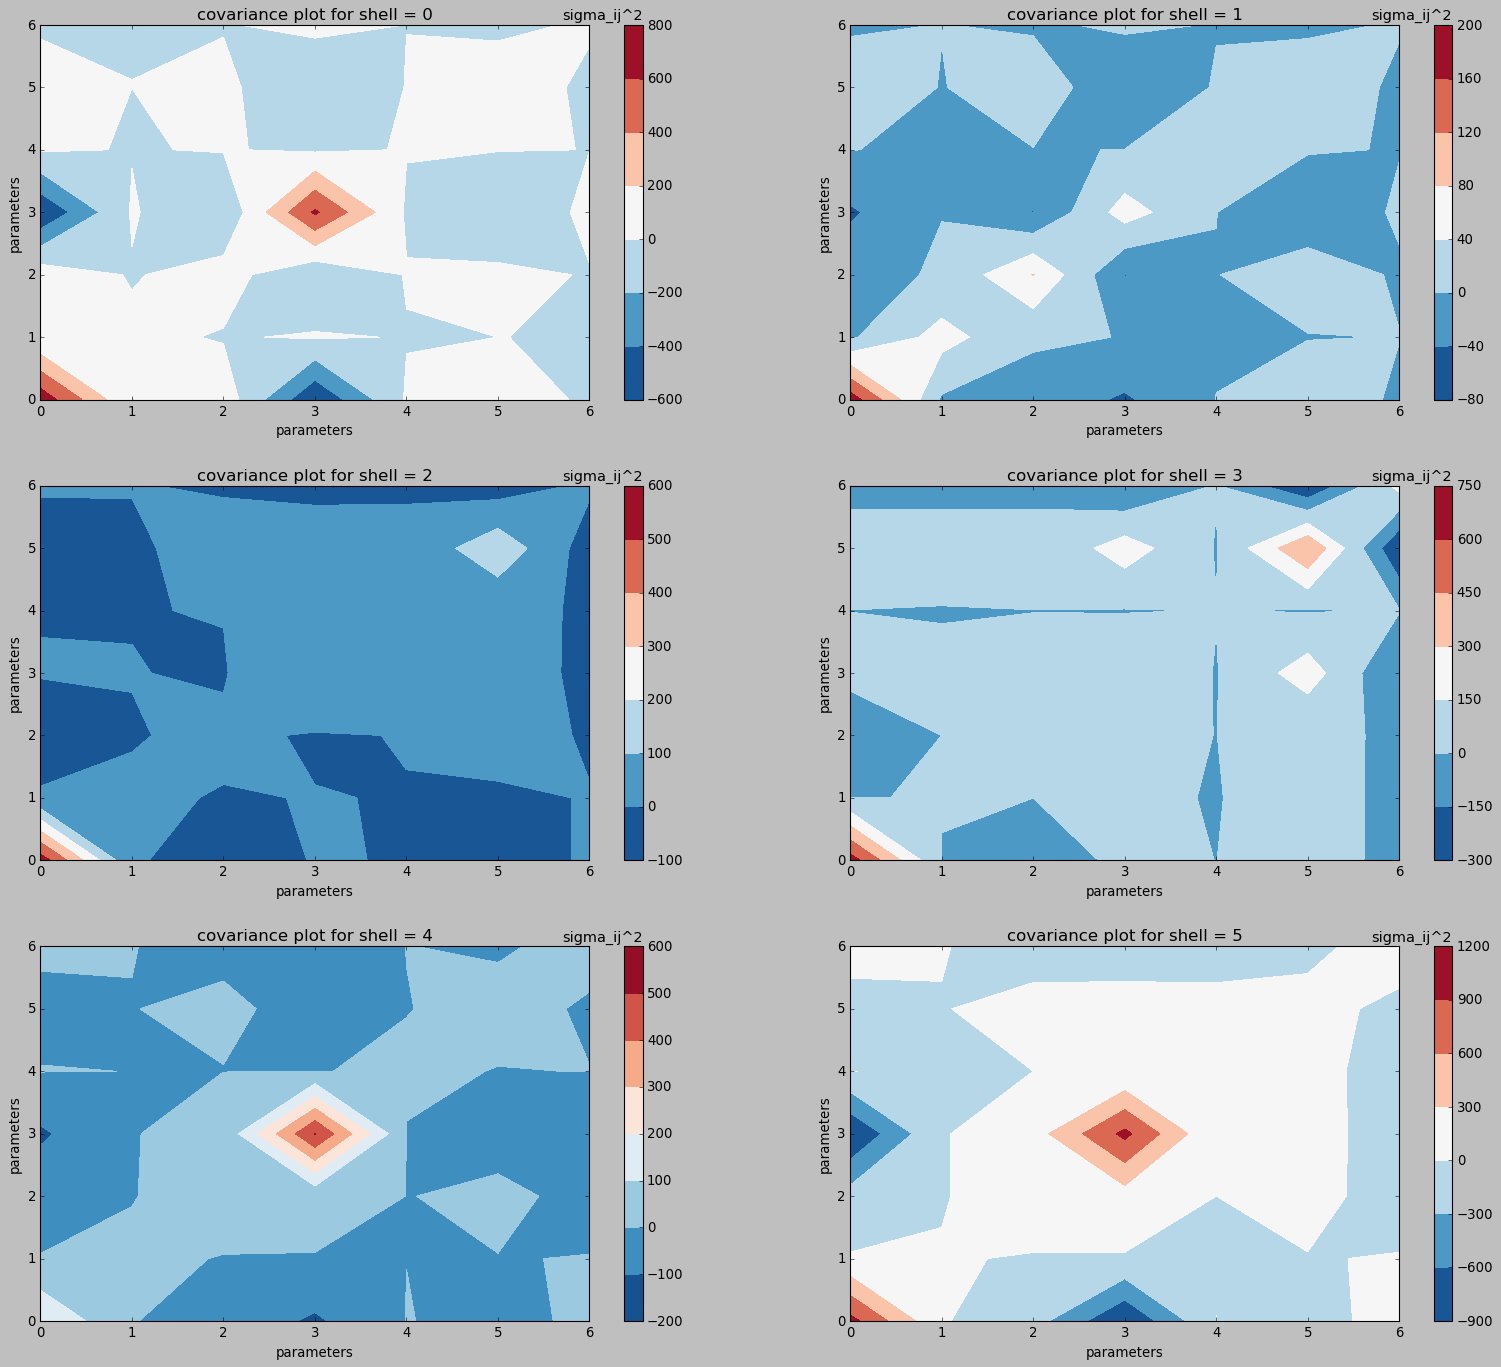

In [41]:
#contour plot 1
reading_data(hess,plot=True)

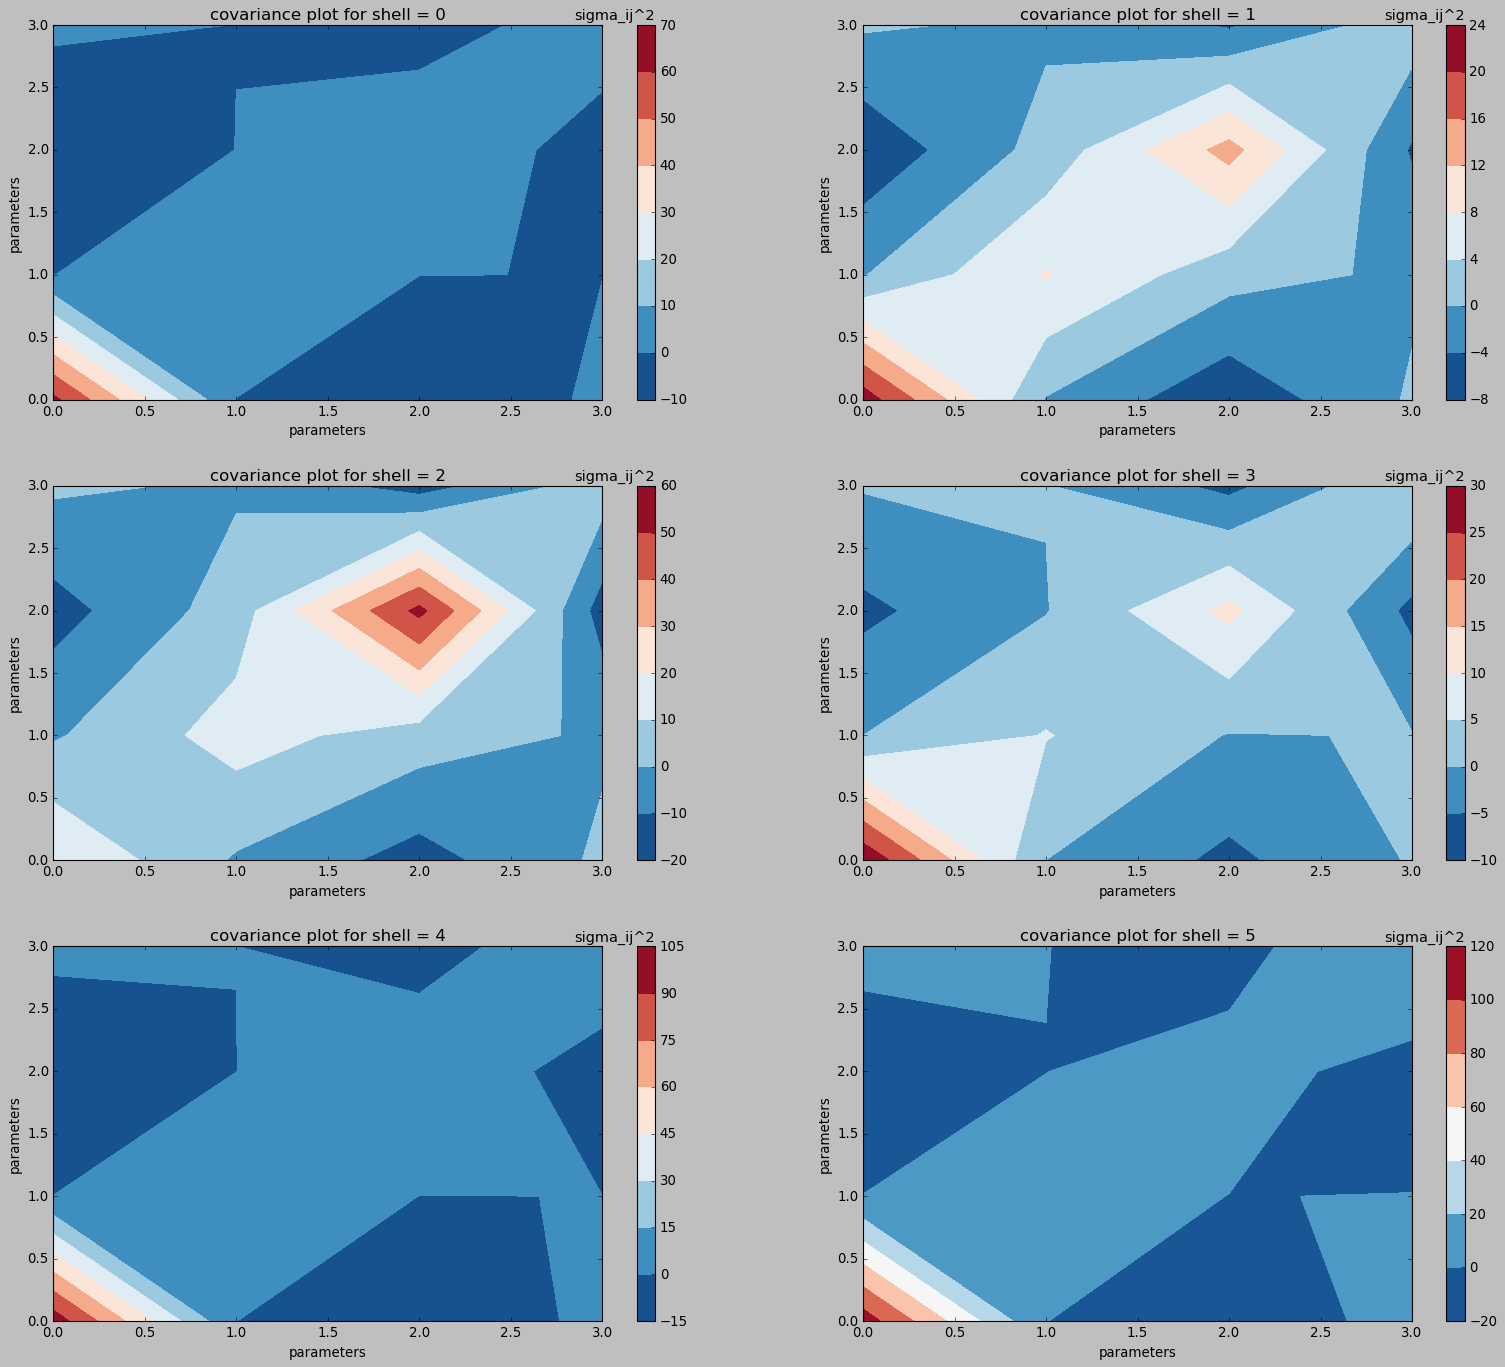

In [42]:
#contour plot 2
reading_data(hess2,plot=True)


In [36]:
#inverse of the hessian matrix
print(np.diag(np.linalg.inv(hess[5])))

[101.64365491  53.67185248  58.40930295  11.83426733  21.56422207
  29.61415535   0.31899895]


In [37]:
print (np.diag(np.sqrt(np.linalg.inv(hess2[5]))))

[2.78523753 4.3821045  4.54456941 0.54914364]


In [56]:
print (np.diag(np.sqrt(np.linalg.inv(hess2[6]))))

[10.88853165  0.426119    0.42744805  0.79361428]


In [ ]:
#pdb trace for bug hunting
import pdb
pdb.pm()


In [ ]:
optim1f,optim2f,aic1f,aic2f,RATIO,para1,aicf1,aicf2 = fitting_final(test1f[1],8,0, 30, 300,0, 200,0,50,True)